In [94]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import missingno as msno
import seaborn as sns 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score

In [5]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("fivethirtyeight")
# 이미지가 레이아웃 안으로 들어오도록 함
mpl.rcParams.update({"figure.constrained_layout.use": True})

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# D2Coding 폰트 경로 (예시 경로, 실제 폰트 경로로 변경 필요)
font_path = r'C:\Users\jaewonchoi\AppData\Local\Microsoft\Windows\Fonts\D2Coding-Ver1.3.2-20180524-all.ttc'

# 폰트 설치 확인
if font_path not in [f.fname for f in fm.fontManager.ttflist]:
    fm.fontManager.addfont(font_path)

# 폰트 설정
plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

In [7]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list if 'D2C' in font]
plt.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
DATASET_DIR = 'C:\\Users\\jaewonchoi\\Desktop\\KDT'
dir_name = 'project'
file_name = 'BigCitiesHealth.csv'

In [9]:
file_path = os.path.join(DATASET_DIR,dir_name,file_name)
df = pd.read_csv(file_path)

df.info()

C:\Users\jaewonchoi\AppData\Local\Temp\ipykernel_78480\664991473.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                189979 non-null  object 
 1   metric_cat_label                 189979 non-null  object 
 2   metric_subcat_label              189979 non-null  object 
 3   metric_item_label_subtitle       189979 non-null  object 
 4   metric_cat_item_yaxis_label      189979 non-null  object 
 5   metric_source_desc_label_fn      189979 non-null  object 
 6   metric_source_desc_label_url_fn  189979 non-null  object 
 7   geo_label_city                   189979 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              189979 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            189979 non-null  float64
 12  da

In [12]:
df["metric_label"] = df["metric_subcat_label"]+' | '+df["metric_item_label"] 

In [13]:
df["metric_label"].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: metric_label, Length: 118, dtype: int64

1. race/sex stratified 된 데이터 체크

In [14]:
list(filter(lambda x: 'strata' in x,df.columns))

['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation',
 'strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']

In [15]:
col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
for col in col_list:
    display(df[col].value_counts())

West         66810
South        62748
Midwest      40546
Northeast    18563
Name: geo_strata_region, dtype: int64

Less poor cities (<18% poor)    141688
Poorest cities (18%+ poor)       46979
Name: geo_strata_poverty, dtype: int64

Smaller (<1.3 million)    134117
Largest (>1.3 million)     54550
Name: geo_strata_Population, dtype: int64

Lower pop. density (<10k per sq mi)      152509
Highest pop. density (>10k per sq mi)     36158
Name: geo_strata_PopDensity, dtype: int64

Less Segregated (<50%)      104633
Highly Segregated (50%+)     84034
Name: geo_strata_Segregation, dtype: int64

In [16]:
col_list = ['strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']
for col in col_list:
    display(df[col].value_counts())

All                              66201
White                            33779
Black                            33286
Hispanic                         28961
Asian/PI                         14895
Asian                             6568
American Indian/Alaska Native     6289
Name: strata_race_label, dtype: int64

Both      123865
Male       35128
Female     30986
Name: strata_sex_label, dtype: int64

White Male         7579
Black Male         7502
White Female       6814
Black Female       6398
Hispanic Male      6323
Hispanic Female    4886
Asian/PI Male      3892
Asian/PI Female    3268
Name: strata_race_sex_label, dtype: int64

In [17]:
np.sum(df['strata_sex_label'].isna())

0

In [18]:
cond1 = (df['strata_race_label'] == 'All') & (df['strata_sex_label'] == 'Both')
np.sum(cond1)

46749

In [19]:
cond0 =(df['strata_sex_label'] == 'Both')
display(df.loc[cond0,'strata_race_label'].value_counts())

All                              46749
White                            19386
Black                            19386
Hispanic                         17752
Asian/PI                          7735
Asian                             6568
American Indian/Alaska Native     6289
Name: strata_race_label, dtype: int64

In [20]:
cond0 =(df['strata_race_label'] == 'All')
display(df.loc[cond0,'strata_sex_label'].value_counts())

Both      46749
Male       9832
Female     9620
Name: strata_sex_label, dtype: int64

In [21]:
cond0 = (df['strata_race_sex_label'].isna())
display(df.loc[cond0,'strata_race_label'].value_counts())
display(df.loc[cond0,'strata_sex_label'].value_counts())

All                              66201
White                            19386
Black                            19386
Hispanic                         17752
Asian/PI                          7735
Asian                             6568
American Indian/Alaska Native     6289
Name: strata_race_label, dtype: int64

Both      123865
Male        9832
Female      9620
Name: strata_sex_label, dtype: int64

In [22]:
cond0 = (~df['strata_race_sex_label'].isna())
display(df.loc[cond0,['strata_race_sex_label','strata_race_label']].value_counts())
display(df.loc[cond0,['strata_race_sex_label','strata_sex_label']].value_counts())

strata_race_sex_label  strata_race_label
White Male             White                7579
Black Male             Black                7502
White Female           White                6814
Black Female           Black                6398
Hispanic Male          Hispanic             6323
Hispanic Female        Hispanic             4886
Asian/PI Male          Asian/PI             3892
Asian/PI Female        Asian/PI             3268
dtype: int64

strata_race_sex_label  strata_sex_label
White Male             Male                7579
Black Male             Male                7502
White Female           Female              6814
Black Female           Female              6398
Hispanic Male          Male                6323
Hispanic Female        Female              4886
Asian/PI Male          Male                3892
Asian/PI Female        Female              3268
dtype: int64

- race_sex_label 은 없애기


In [23]:
cond1 = df['strata_race_label'] == 'Asian'
cond2 = df['strata_race_label'] == 'Asian/PI'

race_cond = cond1 | cond2

df_asianpi=df.loc[race_cond,['strata_race_label','metric_label','geo_label_city','date_label']]


In [24]:
df_asianpi['metric_label'].value_counts()

Deaths | Premature Death                                  1365
Deaths | Deaths from All Causes                           1083
Cancer | All Cancer Deaths                                1077
Cardiovascular Disease | Cardiovascular Disease Deaths    1069
Cardiovascular Disease | Heart Disease Deaths             1035
                                                          ... 
School Violence | Weapons in School                         36
Dietary Quality | Teen Breakfast                            34
Mental Health | Teen Suicidal Ideation                      34
Physical Activity | Teen Physical Education                 30
Deaths | Maternal Deaths                                    13
Name: metric_label, Length: 62, dtype: int64

In [25]:
cond1 = df_asianpi['strata_race_label'] == 'Asian'
cond2 = df_asianpi['strata_race_label'] == 'Asian/PI'

asain_fetare = set(df_asianpi.loc[cond1,'metric_label'].unique())
asainpi_fetare = set(df_asianpi.loc[cond2,'metric_label'].unique())

asain_fetare.intersection(asainpi_fetare)

set()

asian/ asian pi 통일해도 상관 x

In [26]:
cond1 = df['strata_race_label'] == 'Asian'

df_racesex=df[['strata_race_label','strata_sex_label','metric_label','geo_label_city','date_label']]

df_racesex.loc[cond1,'strata_race_label'] = 'Asian/PI'

cond1 = df['strata_race_label'] == 'American Indian/Alaska Native'
df_racesex.loc[cond1,'strata_race_label'] = 'Native'


In [27]:
np.sum(cond1)

6289

In [28]:
df_racesex['metric_label'].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: metric_label, Length: 118, dtype: int64

- 만약 race/sex가 stratified 된 경우에는 각각 모든 항목이 동시에 있는지 : metric_label / sex, race 로 pivot table 만들면 될 듯
- stratifed 된 record가 있는 label과 아닌 label의 비율 -> pivot_table 만든 것 중에서 all, both 인 것들 확인하면 될 듯
    - 이걸 도시/년도 별로도 확인 하면 좋을 듯

In [29]:
pt1 = pd.pivot_table(df_racesex, index = ['geo_label_city','date_label','metric_label'],values=['strata_race_label','strata_sex_label'],aggfunc=lambda x : list(set(x)))
pt2 = pd.pivot_table(df_racesex, index = ['geo_label_city','date_label','metric_label'],values=['strata_race_label','strata_sex_label'],aggfunc=lambda x : (set(x)))

In [30]:
pt2

strata_race_label  \
geo_label_city date_label metric_label                                                                                    
Austin         2010       Active Transportation | Riding Bike to Work                                             {All}   
                          Active Transportation | Walking to Work                                                 {All}   
                          Air Pollution | Hazardous Air Quality                                                   {All}   
                          Air Pollution | Poor Air Quality                                                        {All}   
                          Births | Low Birthweight                              {White, Black, Asian/PI, Hispanic, All}   
...                                                                                                                 ...   
Washington     2022       Substance Use | Opioid Overdose Deaths                          {White, Black, All, Hispanic}   
                          Transportation | Drives Alone to Work         {White, Black, Asian/PI, Hispanic, All, Native}   
                          Transportation | Lack of Car                                                            {All}   
                          Transportation | Longer Driving Commute Time                                            {All}   
                          Transportation | Public Transportation Use    {White, Black, Asian/PI, Hispanic, All, Native}   

                                                                            strata_sex_label  
geo_label_city date_label metric_label                                                        
Austin         2010       Active Transportation | Riding Bike to Work                 {Both}  
                          Active Transportation | Walking to Work                     {Both}  
                          Air Pollution | Hazardous Air Quality                       {Both}  
                          Air Pollution | Poor Air Quality                            {Both}  
                          Births | Low Birthweight                                    {Both}  
...                                                                                      ...  
Washington     2022       Substance Use | Opioid Overdose Deaths        {Male, Both, Female}  
                          Transportation | Drives Alone to Work                       {Both}  
                          Transportation | Lack of Car                                {Both}  
                          Transportation | Longer Driving Commute Time                {Both}  
                          Transportation | Public Transportation Use                  {Both}  

[46749 rows x 2 columns]

In [31]:
pt2.strata_sex_label.value_counts()

{Both}                  36915
{Male, Both, Female}     9618
{Both, Male}              214
{Both, Female}              2
Name: strata_sex_label, dtype: int64

In [32]:
cond_onlyM = pt2['strata_sex_label'] == {'Male','Both'}
cond_onlyF = pt2['strata_sex_label'] == {'Female','Both'}

pt2[cond_onlyF]

strata_race_label  \
geo_label_city date_label metric_label                                           
Boston         2019       Birth Control | Teen Birth Control   {All, Hispanic}   
Detroit        2017       Birth Control | Teen Birth Control      {Black, All}   

                                                             strata_sex_label  
geo_label_city date_label metric_label                                         
Boston         2019       Birth Control | Teen Birth Control   {Both, Female}  
Detroit        2017       Birth Control | Teen Birth Control   {Both, Female}

In [33]:
pt2[cond_onlyM]

strata_race_label  \
geo_label_city date_label metric_label                                                                       
Austin         2010       Sexually Transmitted Disease | HIV-Related Deaths            {White, Black, All}   
               2014       Sexually Transmitted Disease | HIV-Related Deaths  {White, Black, All, Hispanic}   
               2015       Sexually Transmitted Disease | HIV-Related Deaths            {White, Black, All}   
               2016       Sexually Transmitted Disease | HIV-Related Deaths            {White, Black, All}   
               2017       Sexually Transmitted Disease | HIV-Related Deaths  {White, Black, All, Hispanic}   
...                                                                                                    ...   
Tucson         2018       Sexually Transmitted Disease | HIV-Related Deaths                   {White, All}   
               2019       Sexually Transmitted Disease | HIV-Related Deaths                   {White, All}   
               2020       Sexually Transmitted Disease | HIV-Related Deaths                   {White, All}   
               2021       Sexually Transmitted Disease | HIV-Related Deaths         {White, All, Hispanic}   
               2022       Sexually Transmitted Disease | HIV-Related Deaths                   {White, All}   

                                                                            strata_sex_label  
geo_label_city date_label metric_label                                                        
Austin         2010       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2014       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2015       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2016       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2017       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
...                                                                                      ...  
Tucson         2018       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2019       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2020       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2021       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  
               2022       Sexually Transmitted Disease | HIV-Related Deaths     {Both, Male}  

[214 rows x 2 columns]

In [34]:
temp =(pt2.loc[cond_onlyM].index)
temp = temp.to_numpy()

data = dict()

for ele in temp:
    data[(ele[0],ele[1])] = ele[2]
    
#pd.DataFrame(data)

In [35]:
new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])

new_df.unique()

array(['Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Gun Deaths (Firearms)',
       'Substance Use | Opioid Overdose Deaths'], dtype=object)

- strata_race

In [36]:
pt2.strata_race_label.value_counts()

{All}                                              26742
{White, Black, Asian/PI, Hispanic, All}             7520
{White, Black, Asian/PI, Hispanic, All, Native}     6282
{White, Black, All, Hispanic}                       3140
{White, Black, All}                                 1691
{Black, All}                                         249
{White, Black, All, Asian/PI}                        233
{Black, All, Hispanic}                               232
{White, All, Hispanic}                               222
{White, All, Asian/PI, Hispanic}                     209
{All, Hispanic}                                       90
{White, All}                                          73
{Black, All, Asian/PI, Hispanic}                      32
{All, Asian/PI, Hispanic}                             18
{White, All, Asian/PI}                                 9
{White, Black, Hispanic, All, Native}                  7
Name: strata_race_label, dtype: int64

In [37]:
etc_key = list(pt2.strata_race_label.value_counts().keys())[5:]

In [38]:
for key in etc_key[:4]:
    cond_onlyM = pt2['strata_race_label'] == key
    temp =(pt2.loc[cond_onlyM].index).to_numpy()
    data = dict()
    for ele in temp:
        data[(ele[0],ele[1])] = ele[2]

    new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])
    print('-'*30)
    print(key)
    display(new_df.unique())

------------------------------
{'Black', 'All'}


array(['Deaths | Maternal Deaths', 'Substance Use | Teen Smoking',
       'Substance Use | Teen Alcohol',
       'Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Police Killings', 'Crime Incidents | Homicides',
       'Birth Control | Teen Birth Control'], dtype=object)

------------------------------
{'White', 'Black', 'All', 'Asian/PI'}


array(['Cancer | All Cancer Deaths', 'Cancer | Lung Cancer Deaths',
       'Cancer | Breast Cancer Deaths',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Colorectal Cancer Deaths', 'Mental Health | Suicide',
       'Diabetes and Obesity | Diabetes Deaths',
       'Deaths | Deaths from All Causes', 'Deaths | Injury Deaths',
       'Cancer | Prostate Cancer Deaths',
       'Life Expectancy at Birth | Life Expectancy',
       'Deaths | Motor Vehicle Deaths',
       'Substance Use | Drug Overdose Deaths',
       'Substance Use | Opioid Overdose Deaths',
       'Respiratory Infection | COVID-19 Deaths'], dtype=object)

------------------------------
{'Black', 'All', 'Hispanic'}


array(['Deaths | Maternal Deaths', 'Crime Incidents | Homicides',
       'Substance Use | Teen Smoking', 'Deaths | Gun Deaths (Firearms)',
       'Substance Use | Teen Alcohol', 'Deaths | Police Killings',
       'Birth Control | Teen Birth Control', 'Births | Teen Births',
       'Deaths | Motor Vehicle Deaths'], dtype=object)

------------------------------
{'White', 'All', 'Hispanic'}


array(['Substance Use | Opioid Overdose Deaths',
       'Cancer | Prostate Cancer Deaths',
       'Sexually Transmitted Disease | HIV-Related Deaths',
       'Substance Use | Teen Smoking', 'Deaths | Maternal Deaths',
       'Deaths | Motor Vehicle Deaths', 'Deaths | Police Killings',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Colorectal Cancer Deaths'], dtype=object)

In [39]:
for key in etc_key[4:]:
    cond_onlyM = pt2['strata_race_label'] == key
    temp =(pt2.loc[cond_onlyM].index).to_numpy()
    data = dict()
    for ele in temp:
        data[(ele[0],ele[1])] = ele[2]

    new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])
    print('-'*30)
    print(key)
    display(new_df.unique())

------------------------------
{'White', 'All', 'Asian/PI', 'Hispanic'}


array(['Mental Health | Suicide', 'Substance Use | Teen Smoking',
       'School Violence | Weapons in School',
       'Substance Use | Teen Alcohol',
       'Sexually Transmitted Disease | HIV/AIDS Prevalence',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Colorectal Cancer Deaths'], dtype=object)

------------------------------
{'All', 'Hispanic'}


array(['Birth Control | Teen Birth Control',
       'Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Maternal Deaths', 'Substance Use | Teen Smoking'],
      dtype=object)

------------------------------
{'White', 'All'}


array(['Sexually Transmitted Disease | HIV-Related Deaths',
       'Deaths | Police Killings',
       'Substance Use | Opioid Overdose Deaths',
       'Respiratory Infection | Pneumonia or Influenza Deaths',
       'Cancer | Breast Cancer Deaths', 'Deaths | Motor Vehicle Deaths',
       'Birth Control | Teen Birth Control'], dtype=object)

------------------------------
{'Black', 'All', 'Asian/PI', 'Hispanic'}


array(['Crime Incidents | Homicides', 'Deaths | Infant Deaths',
       'Substance Use | Teen Smoking', 'Births | Teen Births'],
      dtype=object)

------------------------------
{'All', 'Asian/PI', 'Hispanic'}


array(['Substance Use | Teen Smoking',
       'Diabetes and Obesity | Teen Obesity'], dtype=object)

------------------------------
{'White', 'All', 'Asian/PI'}


array(['Mental Health | Suicide',
       'Respiratory Infection | Pneumonia or Influenza Deaths'],
      dtype=object)

------------------------------
{'White', 'Black', 'Hispanic', 'All', 'Native'}


array(['Sexually Transmitted Disease | HIV/AIDS Prevalence'], dtype=object)

In [40]:

def check_func(x):
    if len(x.intersection(set(['White','Black'])))==2 : return False
    else : return True


etc_key2 = list(filter(check_func,pt2.strata_race_label.value_counts().keys()))

etc_key2 = etc_key2[1:]

In [41]:
rslt = set()

for key in etc_key2:
    cond_onlyM = pt2['strata_race_label'] == key
    temp =(pt2.loc[cond_onlyM].index).to_numpy()
    data = dict()
    for ele in temp:
        data[(ele[0],ele[1])] = ele[2]

    new_df = pd.DataFrame(data,index=range(len(data))).stack([0,1])
    rslt=rslt.union(set(new_df.unique()))
    
rslt

{'Birth Control | Teen Birth Control',
 'Births | Teen Births',
 'Cancer | Breast Cancer Deaths',
 'Cancer | Colorectal Cancer Deaths',
 'Cancer | Prostate Cancer Deaths',
 'Crime Incidents | Homicides',
 'Deaths | Gun Deaths (Firearms)',
 'Deaths | Infant Deaths',
 'Deaths | Maternal Deaths',
 'Deaths | Motor Vehicle Deaths',
 'Deaths | Police Killings',
 'Diabetes and Obesity | Teen Obesity',
 'Mental Health | Suicide',
 'Respiratory Infection | Pneumonia or Influenza Deaths',
 'School Violence | Weapons in School',
 'Sexually Transmitted Disease | HIV-Related Deaths',
 'Sexually Transmitted Disease | HIV/AIDS Prevalence',
 'Substance Use | Opioid Overdose Deaths',
 'Substance Use | Teen Alcohol',
 'Substance Use | Teen Smoking'}

- df_racesex 에 대해서 각 label 별로 비율

In [42]:
df_racesex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   strata_race_label  189979 non-null  object
 1   strata_sex_label   189979 non-null  object
 2   metric_label       189979 non-null  object
 3   geo_label_city     189979 non-null  object
 4   date_label         189979 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.2+ MB


In [43]:
labels = df_racesex['metric_label'].unique()
form = df_racesex['strata_race_label'].value_counts()
form.iloc[:] = 0

In [44]:
rslt = dict()
key = 'strata_race_label'

for feat in labels:
    cond = df_racesex['metric_label']==feat
    val = form.copy()
    temp = df_racesex.loc[cond,key].value_counts()
    val.loc[temp.index] = temp
    rslt[feat] = val
    
rslt = pd.DataFrame(rslt).T

In [45]:
type(rslt.iloc[0])

pandas.core.series.Series

In [46]:
rslt.iloc[0]

All         1378
White       1245
Black       1293
Hispanic    1240
Asian/PI    1077
Native         0
Name: Cancer | All Cancer Deaths, dtype: int64

In [47]:
rslt.index[0]

'Cancer | All Cancer Deaths'

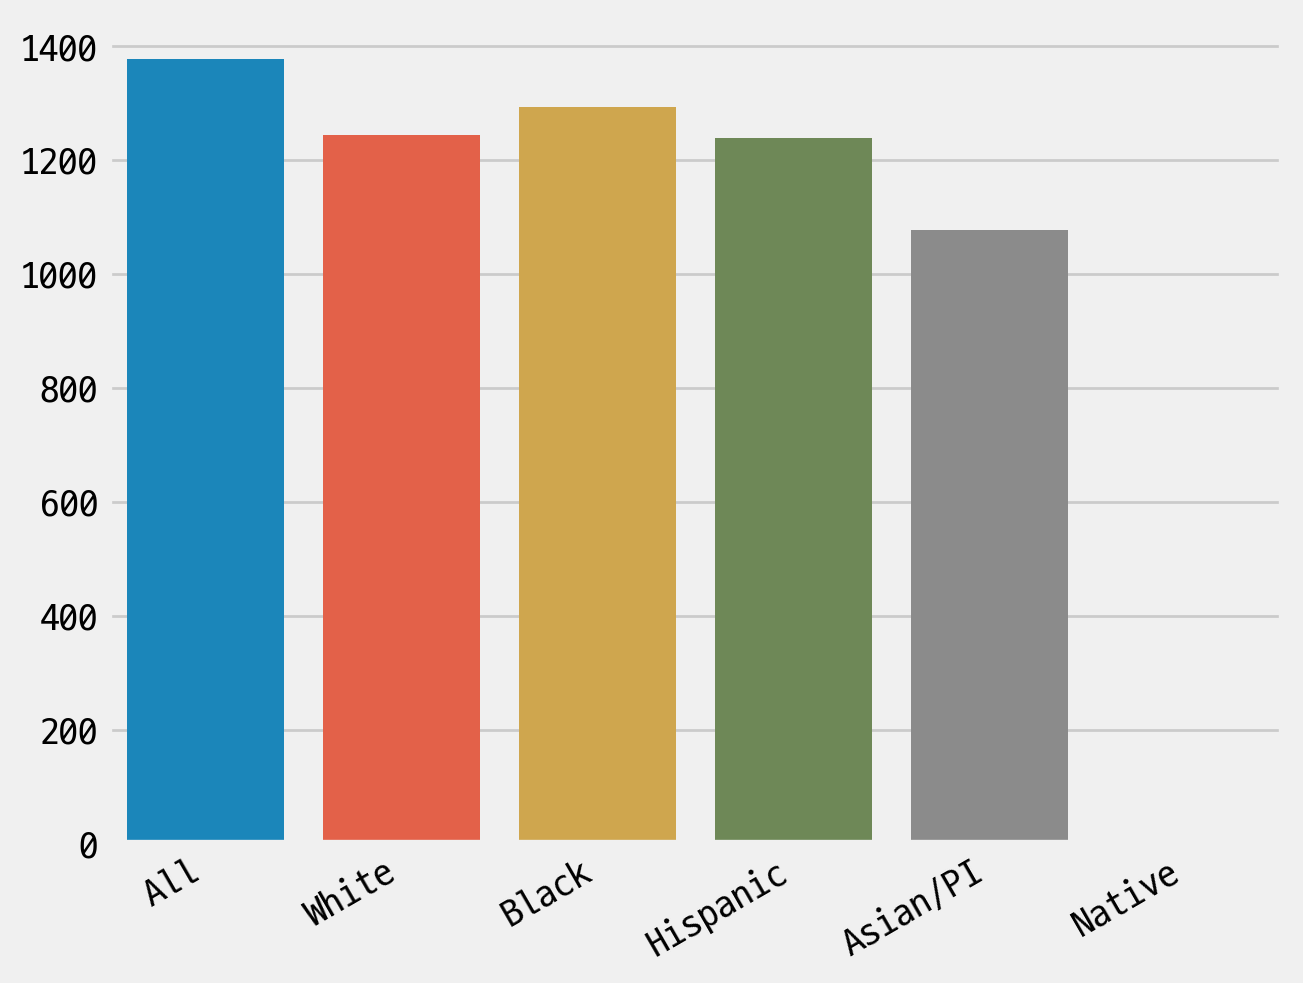

In [48]:
fig, axes = plt.subplots()
sns.barplot(x=rslt.iloc[0].index, y = rslt.iloc[0].values,ax =axes)
axes.set_xlabel('')
plt.setp(axes.get_xticklabels(),ha = 'right',rotation = 30);

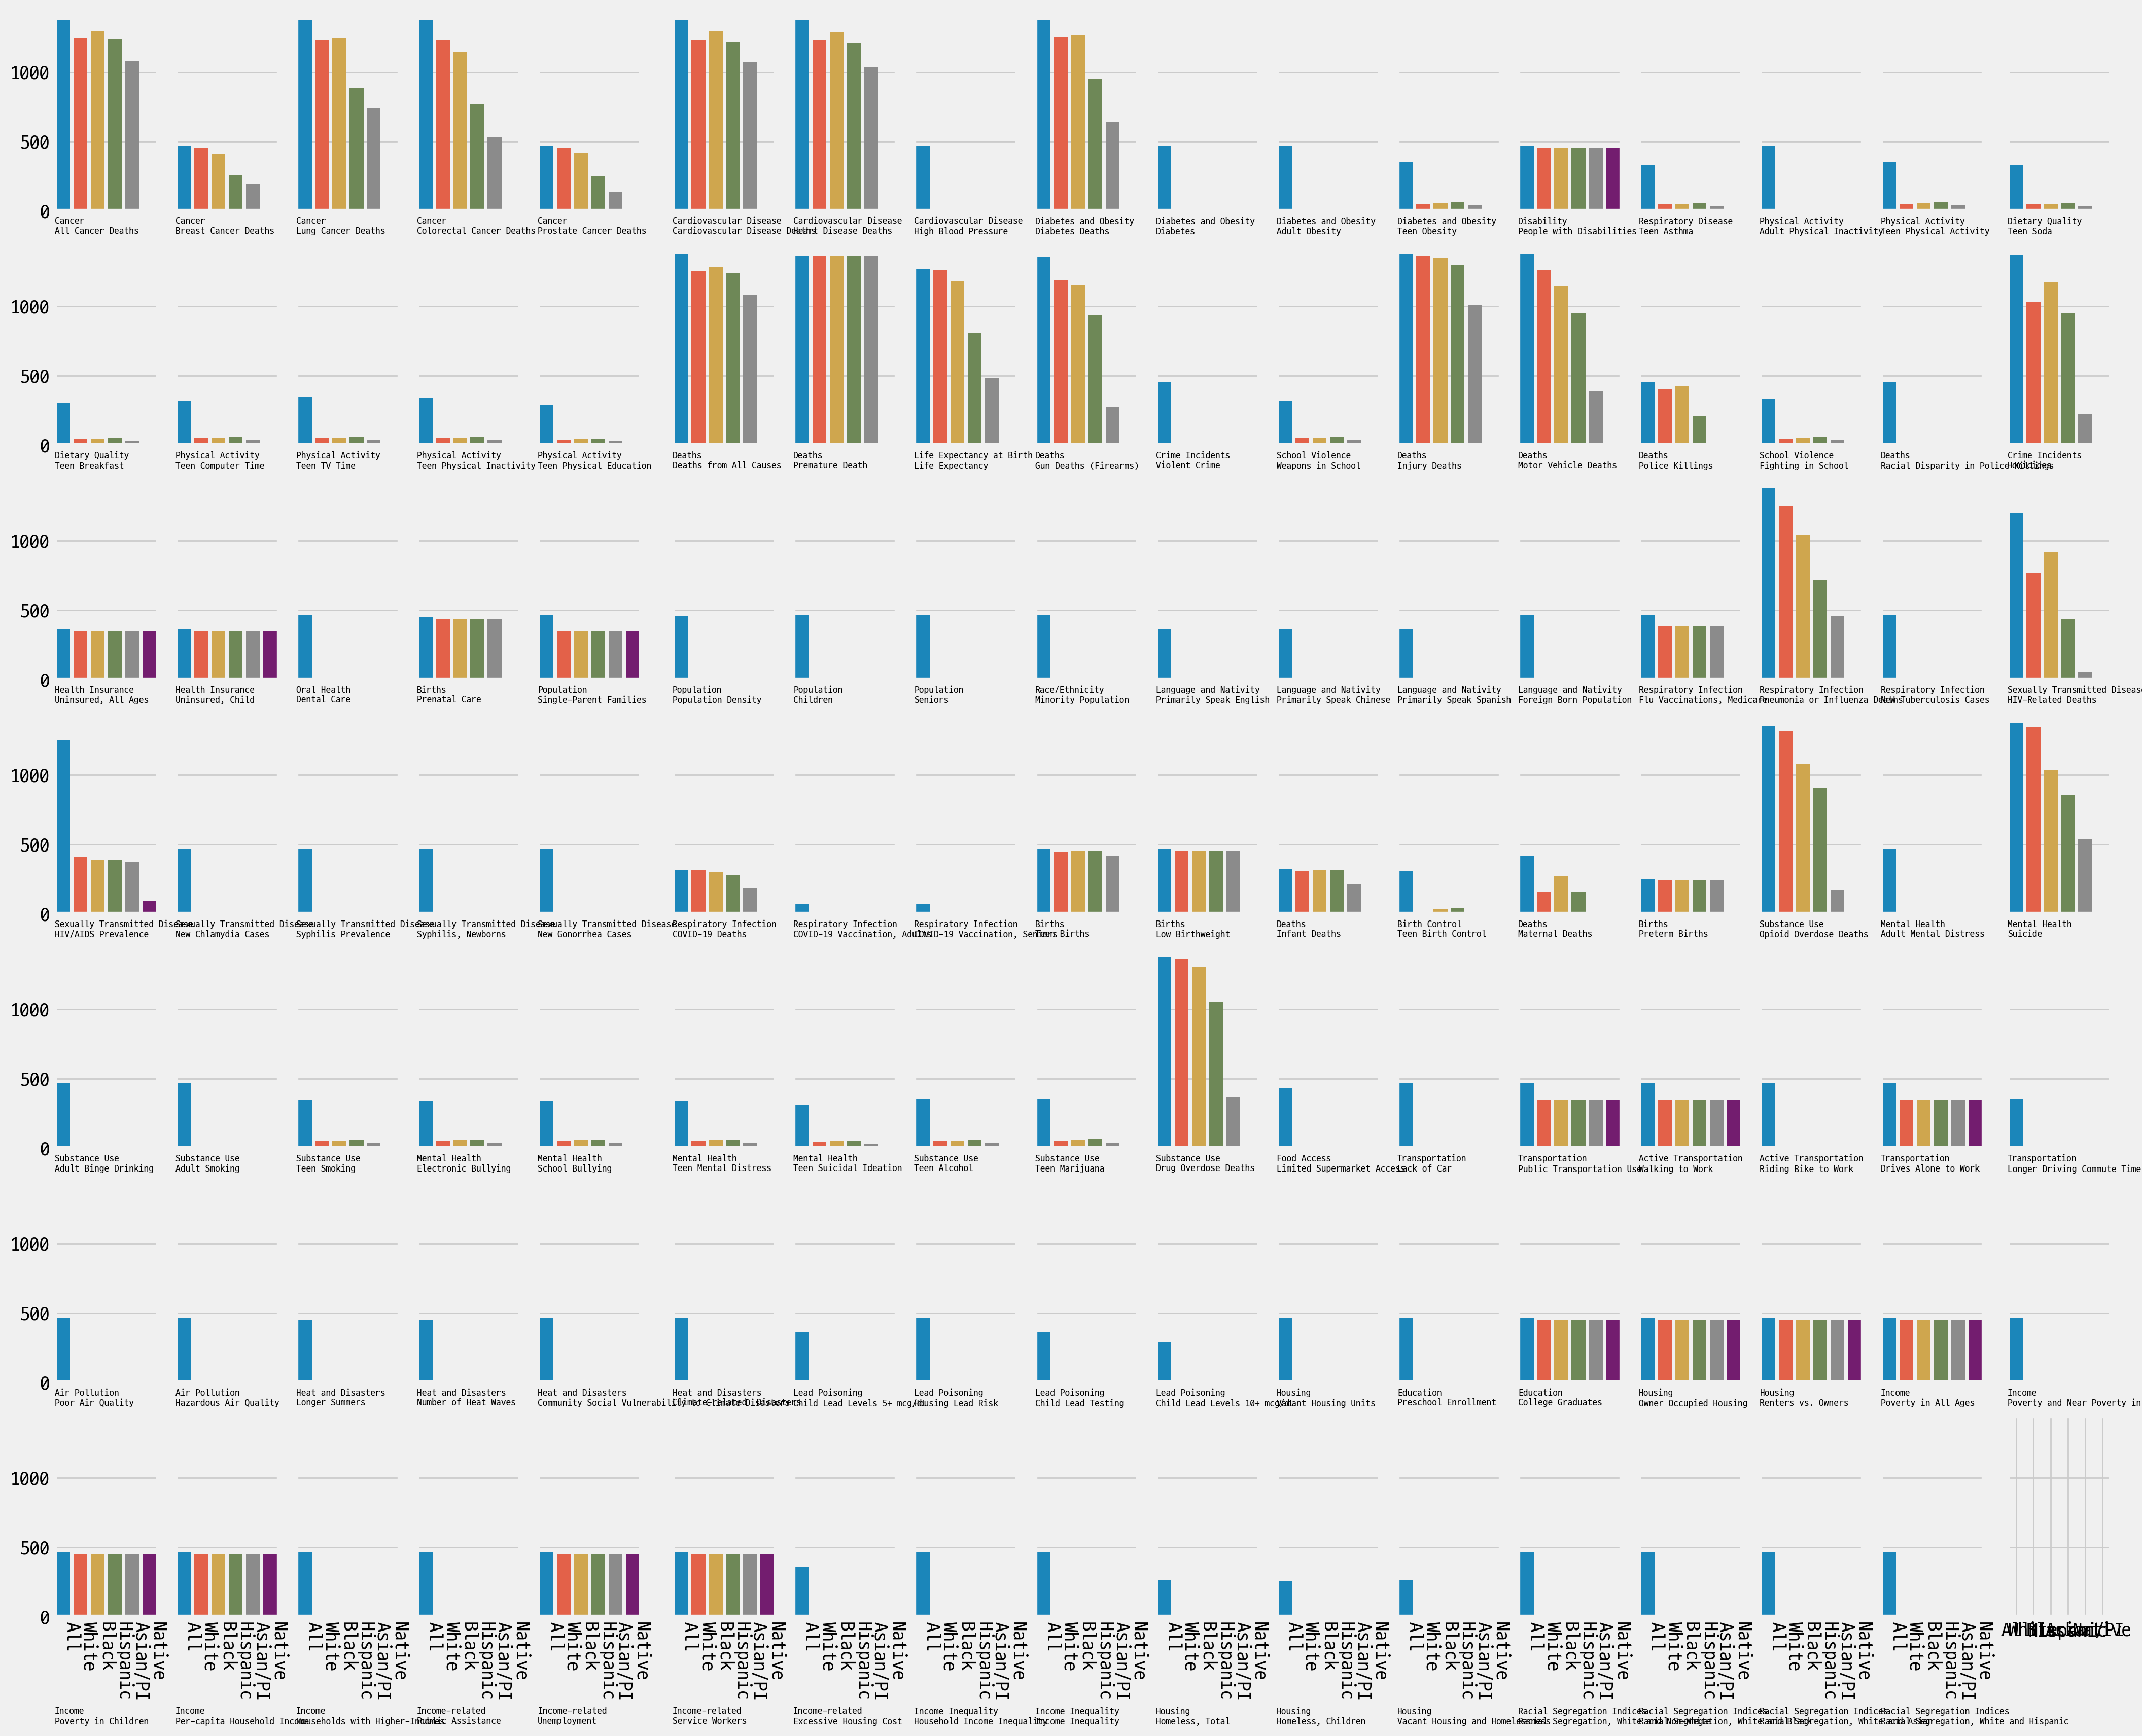

In [49]:
fig, axes = plt.subplots(7,17,figsize=(21,17),sharex=True,sharey=True)

for n,ax in enumerate(axes.flatten()[:-1]):
    sns.barplot(x=rslt.iloc[n].index, y = rslt.iloc[n].values,ax =ax)
    feat_name = rslt.index[n].split(' | ')
    ax.set_xlabel(f'{feat_name[0]}\n{feat_name[1]}',loc='left',fontsize = 7)
    plt.setp(ax.get_xticklabels(),ha = 'left',rotation = 270)
    
pass

In [50]:
    
#pd.DataFrame(data)

In [51]:
#pt2.strata_race_label.unique() #set, list의 경우는 unique로는 안되고 tuple로 해야 함

2. geo_strata 관련 column들 확인

In [52]:
df['geo_label_city'].unique()

array(['Cleveland', 'Oakland', 'San Francisco', 'Long Beach', 'Dallas',
       'Las Vegas', 'San Antonio', 'Columbus', 'Seattle', 'New York City',
       'Tucson', 'Phoenix', 'Fort Worth', 'Indianapolis', 'Oklahoma City',
       'San Diego', 'Houston', 'Boston', 'Philadelphia', 'Denver',
       'Charlotte', 'Portland', 'Kansas City', 'Los Angeles',
       'Washington', 'Detroit', 'Chicago', 'Milwaukee', 'San Jose',
       'Austin', 'Memphis', 'Louisville', 'Baltimore', 'Minneapolis',
       'El Paso', 'U.S. Total'], dtype=object)

In [53]:
col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
df[['geo_label_city']+col_list].value_counts()

geo_label_city  geo_strata_region  geo_strata_poverty            geo_strata_Population   geo_strata_PopDensity                  geo_strata_Segregation  
New York City   Northeast          Less poor cities (<18% poor)  Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    6535
Houston         South              Poorest cities (18%+ poor)    Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    6431
Los Angeles     West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    6372
Philadelphia    Northeast          Poorest cities (18%+ poor)    Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    6310
San Diego       West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Less Segregated (<50%)      6251
Chicago         Midwest            Less po

In [54]:
len(df[['geo_label_city']+col_list].value_counts()), len(df['geo_label_city'].value_counts())


(35, 36)

3. value_ci 관련 col 확인

In [55]:
df['value_ci_flag_yesno'].value_counts()

yes    118682
no      71297
Name: value_ci_flag_yesno, dtype: int64

In [56]:
np.sum(df['value_ci_flag_yesno'].isna())

0

In [57]:
list(filter(lambda x: 'ci' in x,df.columns))

['geo_label_city',
 'geo_label_citystate',
 'value_ci_flag_yesno',
 'value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

In [58]:
df[['value_ci_flag_yesno',
    'value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']]

value_ci_flag_yesno  value_95_ci_low  value_95_ci_high  \
0                      yes       195.006700        225.194591   
1                      yes       124.494012        211.553695   
2                      yes        92.047403        101.613187   
3                      yes        88.474786        122.786969   
4                      yes       275.648062        320.086062   
...                    ...              ...               ...   
189974                  no              NaN               NaN   
189975                  no              NaN               NaN   
189976                  no              NaN               NaN   
189977                  no              NaN               NaN   
189978                  no              NaN               NaN   

        value_90_ci_low  value_90_ci_high  
0                   NaN               NaN  
1                   NaN               NaN  
2                   NaN               NaN  
3                   NaN               NaN  
4                   NaN               NaN  
...                 ...               ...  
189974              NaN               NaN  
189975              NaN               NaN  
189976              NaN               NaN  
189977              NaN               NaN  
189978              NaN               NaN  

[189979 rows x 5 columns]

In [59]:
col_list = ['value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

cond1 = df[col_list].isna().all(axis=1)
cond2 = df['value_ci_flag_yesno'] == 'no'

np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

(0, 71297, 71297)

In [60]:
len(df.loc[cond1,'metric_label'].unique())

117

In [61]:
len(df.loc[~cond1,'metric_label'].unique())

53

In [62]:
df.loc[~cond1,'metric_label'].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides                            

In [63]:
metric_w_ci = set(df.loc[~cond1,'metric_label'].unique())
metric_wo_ci = set(df.loc[cond1,'metric_label'].unique())

metric_w_ci.difference(metric_wo_ci)

{'Deaths | Premature Death'}

In [64]:
len(metric_wo_ci.difference(metric_w_ci)), len(metric_wo_ci)

(65, 117)

In [65]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[:20]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Active Transportation | Riding Bike to Work                                      :        468
Active Transportation | Walking to Work                                          :       2218
Air Pollution | Hazardous Air Quality                                            :        467
Air Pollution | Poor Air Quality                                                 :        467
Crime Incidents | Violent Crime                                                  :        454
Deaths | Police Killings                                                         :       1495
Deaths | Racial Disparity in Police Killings                                     :        455
Disability | People with Disabilities                                            :       2743
Education | College Graduates                                                    :       2743
Education | Preschool Enrollment                                                 :        468
Food Access | Limited Supermarket Access                    

In [66]:
for col in metirc_null_ci[20:40]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Housing | Renters vs. Owners                                                     :       2743
Housing | Vacant Housing Units                                                   :        468
Housing | Vacant Housing and Homelessness                                        :        266
Income Inequality | Household Income Inequality                                  :        468
Income Inequality | Income Inequality                                            :        468
Income | Households with Higher-Incomes                                          :        468
Income | Per-capita Household Income                                             :       2743
Income | Poverty and Near Poverty in All Ages                                    :        468
Income | Poverty in All Ages                                                     :       2743
Income | Poverty in Children                                                     :       2743
Income-related | Excessive Housing Cost                     

In [67]:
for col in metirc_null_ci[40:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Lead Poisoning | Child Lead Testing                                              :        361
Lead Poisoning | Housing Lead Risk                                               :        468
Life Expectancy at Birth | Life Expectancy                                       :       5004
Population | Children                                                            :        468
Population | Population Density                                                  :        455
Population | Seniors                                                             :        468
Population | Single-Parent Families                                              :       2218
Race/Ethnicity | Minority Population                                             :        468
Racial Segregation Indices | Racial Segregation, White and Asian                 :        468
Racial Segregation Indices | Racial Segregation, White and Black                 :        468
Racial Segregation Indices | Racial Segregation, White and H

### U.S. Total 분리

In [68]:
df['geo_label_city'].value_counts()

New York City    6535
Houston          6431
Los Angeles      6372
Philadelphia     6310
San Diego        6251
Chicago          6210
San Francisco    6121
Las Vegas        5849
Boston           5718
Oakland          5676
Dallas           5655
Fort Worth       5628
Seattle          5507
Phoenix          5437
Charlotte        5381
San Antonio      5349
Washington       5264
Portland         5219
Long Beach       5216
San Jose         5206
Austin           5198
Detroit          5160
Denver           5157
Cleveland        5113
Baltimore        5101
Oklahoma City    5030
Indianapolis     4916
Columbus         4907
Milwaukee        4881
Kansas City      4848
Tucson           4799
Memphis          4631
El Paso          4553
Louisville       4527
Minneapolis      4511
U.S. Total       1312
Name: geo_label_city, dtype: int64

In [69]:
cond0 = df['geo_label_city'] == 'U.S. Total'

df_US = df.loc[cond0].copy()
df_city = df.loc[~cond0].copy()

display(df_US.info())
display(df_city.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 5718 to 189943
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metric_item_label                1312 non-null   object 
 1   metric_cat_label                 1312 non-null   object 
 2   metric_subcat_label              1312 non-null   object 
 3   metric_item_label_subtitle       1312 non-null   object 
 4   metric_cat_item_yaxis_label      1312 non-null   object 
 5   metric_source_desc_label_fn      1312 non-null   object 
 6   metric_source_desc_label_url_fn  1312 non-null   object 
 7   geo_label_city                   1312 non-null   object 
 8   geo_label_state                  0 non-null      object 
 9   geo_label_citystate              1312 non-null   object 
 10  geo_fips_code                    0 non-null      float64
 11  value                            1312 non-null   float64
 12  date_label     

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188667 entries, 0 to 189978
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                188667 non-null  object 
 1   metric_cat_label                 188667 non-null  object 
 2   metric_subcat_label              188667 non-null  object 
 3   metric_item_label_subtitle       188667 non-null  object 
 4   metric_cat_item_yaxis_label      188667 non-null  object 
 5   metric_source_desc_label_fn      188667 non-null  object 
 6   metric_source_desc_label_url_fn  188667 non-null  object 
 7   geo_label_city                   188667 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              188667 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            188667 non-null  float64
 12  da

None

In [70]:
cond1 = (df_city['strata_race_label'] == 'All') & (df_city['strata_sex_label'] == 'Both')
np.sum(cond1)

45437

In [71]:
col_list = ['value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

cond1 = df_city[col_list].isna().all(axis=1)
cond2 = df_city['value_ci_flag_yesno'] == 'no'

np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

(0, 70183, 70183)

In [72]:
df_city.loc[~cond1,'metric_label'].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides                            

In [73]:
len(df_city.loc[~cond1,'metric_label'].value_counts())

53

In [74]:
metric_w_ci = set(df_city.loc[~cond1,'metric_label'].unique())
metric_wo_ci = set(df_city.loc[cond1,'metric_label'].unique())

metric_w_ci.difference(metric_wo_ci)

{'Births | Low Birthweight',
 'Births | Prenatal Care',
 'Births | Preterm Births',
 'Births | Teen Births',
 'Cancer | All Cancer Deaths',
 'Cancer | Breast Cancer Deaths',
 'Cancer | Colorectal Cancer Deaths',
 'Cancer | Lung Cancer Deaths',
 'Cancer | Prostate Cancer Deaths',
 'Cardiovascular Disease | Cardiovascular Disease Deaths',
 'Cardiovascular Disease | Heart Disease Deaths',
 'Cardiovascular Disease | High Blood Pressure',
 'Crime Incidents | Homicides',
 'Deaths | Deaths from All Causes',
 'Deaths | Gun Deaths (Firearms)',
 'Deaths | Infant Deaths',
 'Deaths | Injury Deaths',
 'Deaths | Maternal Deaths',
 'Deaths | Motor Vehicle Deaths',
 'Deaths | Premature Death',
 'Diabetes and Obesity | Adult Obesity',
 'Diabetes and Obesity | Diabetes',
 'Diabetes and Obesity | Diabetes Deaths',
 'Mental Health | Adult Mental Distress',
 'Mental Health | Suicide',
 'Oral Health | Dental Care',
 'Physical Activity | Adult Physical Inactivity',
 'Respiratory Infection | COVID-19 Deaths',

In [75]:
metirc_full_ci = sorted(list(metric_w_ci.difference(metric_wo_ci)))

for col in metirc_full_ci[:20]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Births | Low Birthweight                                                         :       2275
Births | Prenatal Care                                                           :       2185
Births | Preterm Births                                                          :       1225
Births | Teen Births                                                             :       2235
Cancer | All Cancer Deaths                                                       :       6220
Cancer | Breast Cancer Deaths                                                    :       1773
Cancer | Colorectal Cancer Deaths                                                :       5044
Cancer | Lung Cancer Deaths                                                      :       5475
Cancer | Prostate Cancer Deaths                                                  :       1713
Cardiovascular Disease | Cardiovascular Disease Deaths                           :       6182
Cardiovascular Disease | Heart Disease Deaths               

In [76]:
for col in metirc_full_ci[20:]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Diabetes and Obesity | Adult Obesity                                             :        455
Diabetes and Obesity | Diabetes                                                  :        455
Diabetes and Obesity | Diabetes Deaths                                           :       5476
Mental Health | Adult Mental Distress                                            :        455
Mental Health | Suicide                                                          :       5137
Oral Health | Dental Care                                                        :        455
Physical Activity | Adult Physical Inactivity                                    :        455
Respiratory Infection | COVID-19 Deaths                                          :       1396
Respiratory Infection | Pneumonia or Influenza Deaths                            :       4827
Sexually Transmitted Disease | HIV-Related Deaths                                :       3368
Substance Use | Adult Binge Drinking                        

In [77]:
len(metirc_full_ci)

34

In [78]:
# 'date_label'그룹으로  'metric_item_label' 재구성
grouped_data = df.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)

grouped_data.head()


metric_item_label  Adult Binge Drinking  Adult Mental Distress  Adult Obesity  \
date_label                                                                      
2010                                 36                     36             36   
2011                                 36                     36             36   
2012                                 36                     36             36   
2013                                 36                     36             36   
2014                                 36                     36             36   

metric_item_label  Adult Physical Inactivity  Adult Smoking  \
date_label                                                    
2010                                      36             36   
2011                                      36             36   
2012                                      36             36   
2013                                      36             36   
2014                                      36             36   

metric_item_label  All Cancer Deaths  Breast Cancer Deaths  COVID-19 Deaths  \
date_label                                                                    
2010                             448                   128                0   
2011                             464                   134                0   
2012                             468                   135                0   
2013                             472                   134                0   
2014                             478                   135                0   

metric_item_label  COVID-19 Vaccination, Adults  \
date_label                                        
2010                                          0   
2011                                          0   
2012                                          0   
2013                                          0   
2014                                          0   

metric_item_label  COVID-19 Vaccination, Seniors  ...  Teen Suicidal Ideation  \
date_label                                        ...                           
2010                                           0  ...                      18   
2011                                           0  ...                      74   
2012                                           0  ...                      18   
2013                                           0  ...                      84   
2014                                           0  ...                      18   

metric_item_label  Teen TV Time  Unemployment  Uninsured, All Ages  \
date_label                                                           
2010                         20           211                    0   
2011                         81           211                    0   
2012                         20           211                    0   
2013                         92           211                  211   
2014                         20           211                  211   

metric_item_label  Uninsured, Child  Vacant Housing Units  \
date_label                                                  
2010                              0                    36   
2011                              0                    36   
2012                              0                    36   
2013                            211                    36   
2014                            211                    36   

metric_item_label  Vacant Housing and Homelessness  Violent Crime  \
date_label                                                          
2010                                             0             36   
2011                                             0             36   
2012                                             0             36   
2013                                             0             36   
2014                                             0             35   

metric_item_label  Walking to Work  Weapons in School  
date_label                                         

In [79]:
# date_label별로 정렬
df_sorted = df.sort_values(by='date_label')

# 각 연도별로 metric_item_label의 개수를 세분화하여 계산
detailed_counts_per_year = df_sorted.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)

# 결과 확인
detailed_counts_per_year.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환
print(detailed_counts_per_year)

metric_item_label  date_label  Adult Binge Drinking  Adult Mental Distress  \
0                        2010                    36                     36   
1                        2011                    36                     36   
2                        2012                    36                     36   
3                        2013                    36                     36   
4                        2014                    36                     36   
5                        2015                    36                     36   
6                        2016                    36                     36   
7                        2017                    36                     36   
8                        2018                    36                     36   
9                        2019                    36                     36   
10                       2020                    36                     36   
11                       2021                    36             

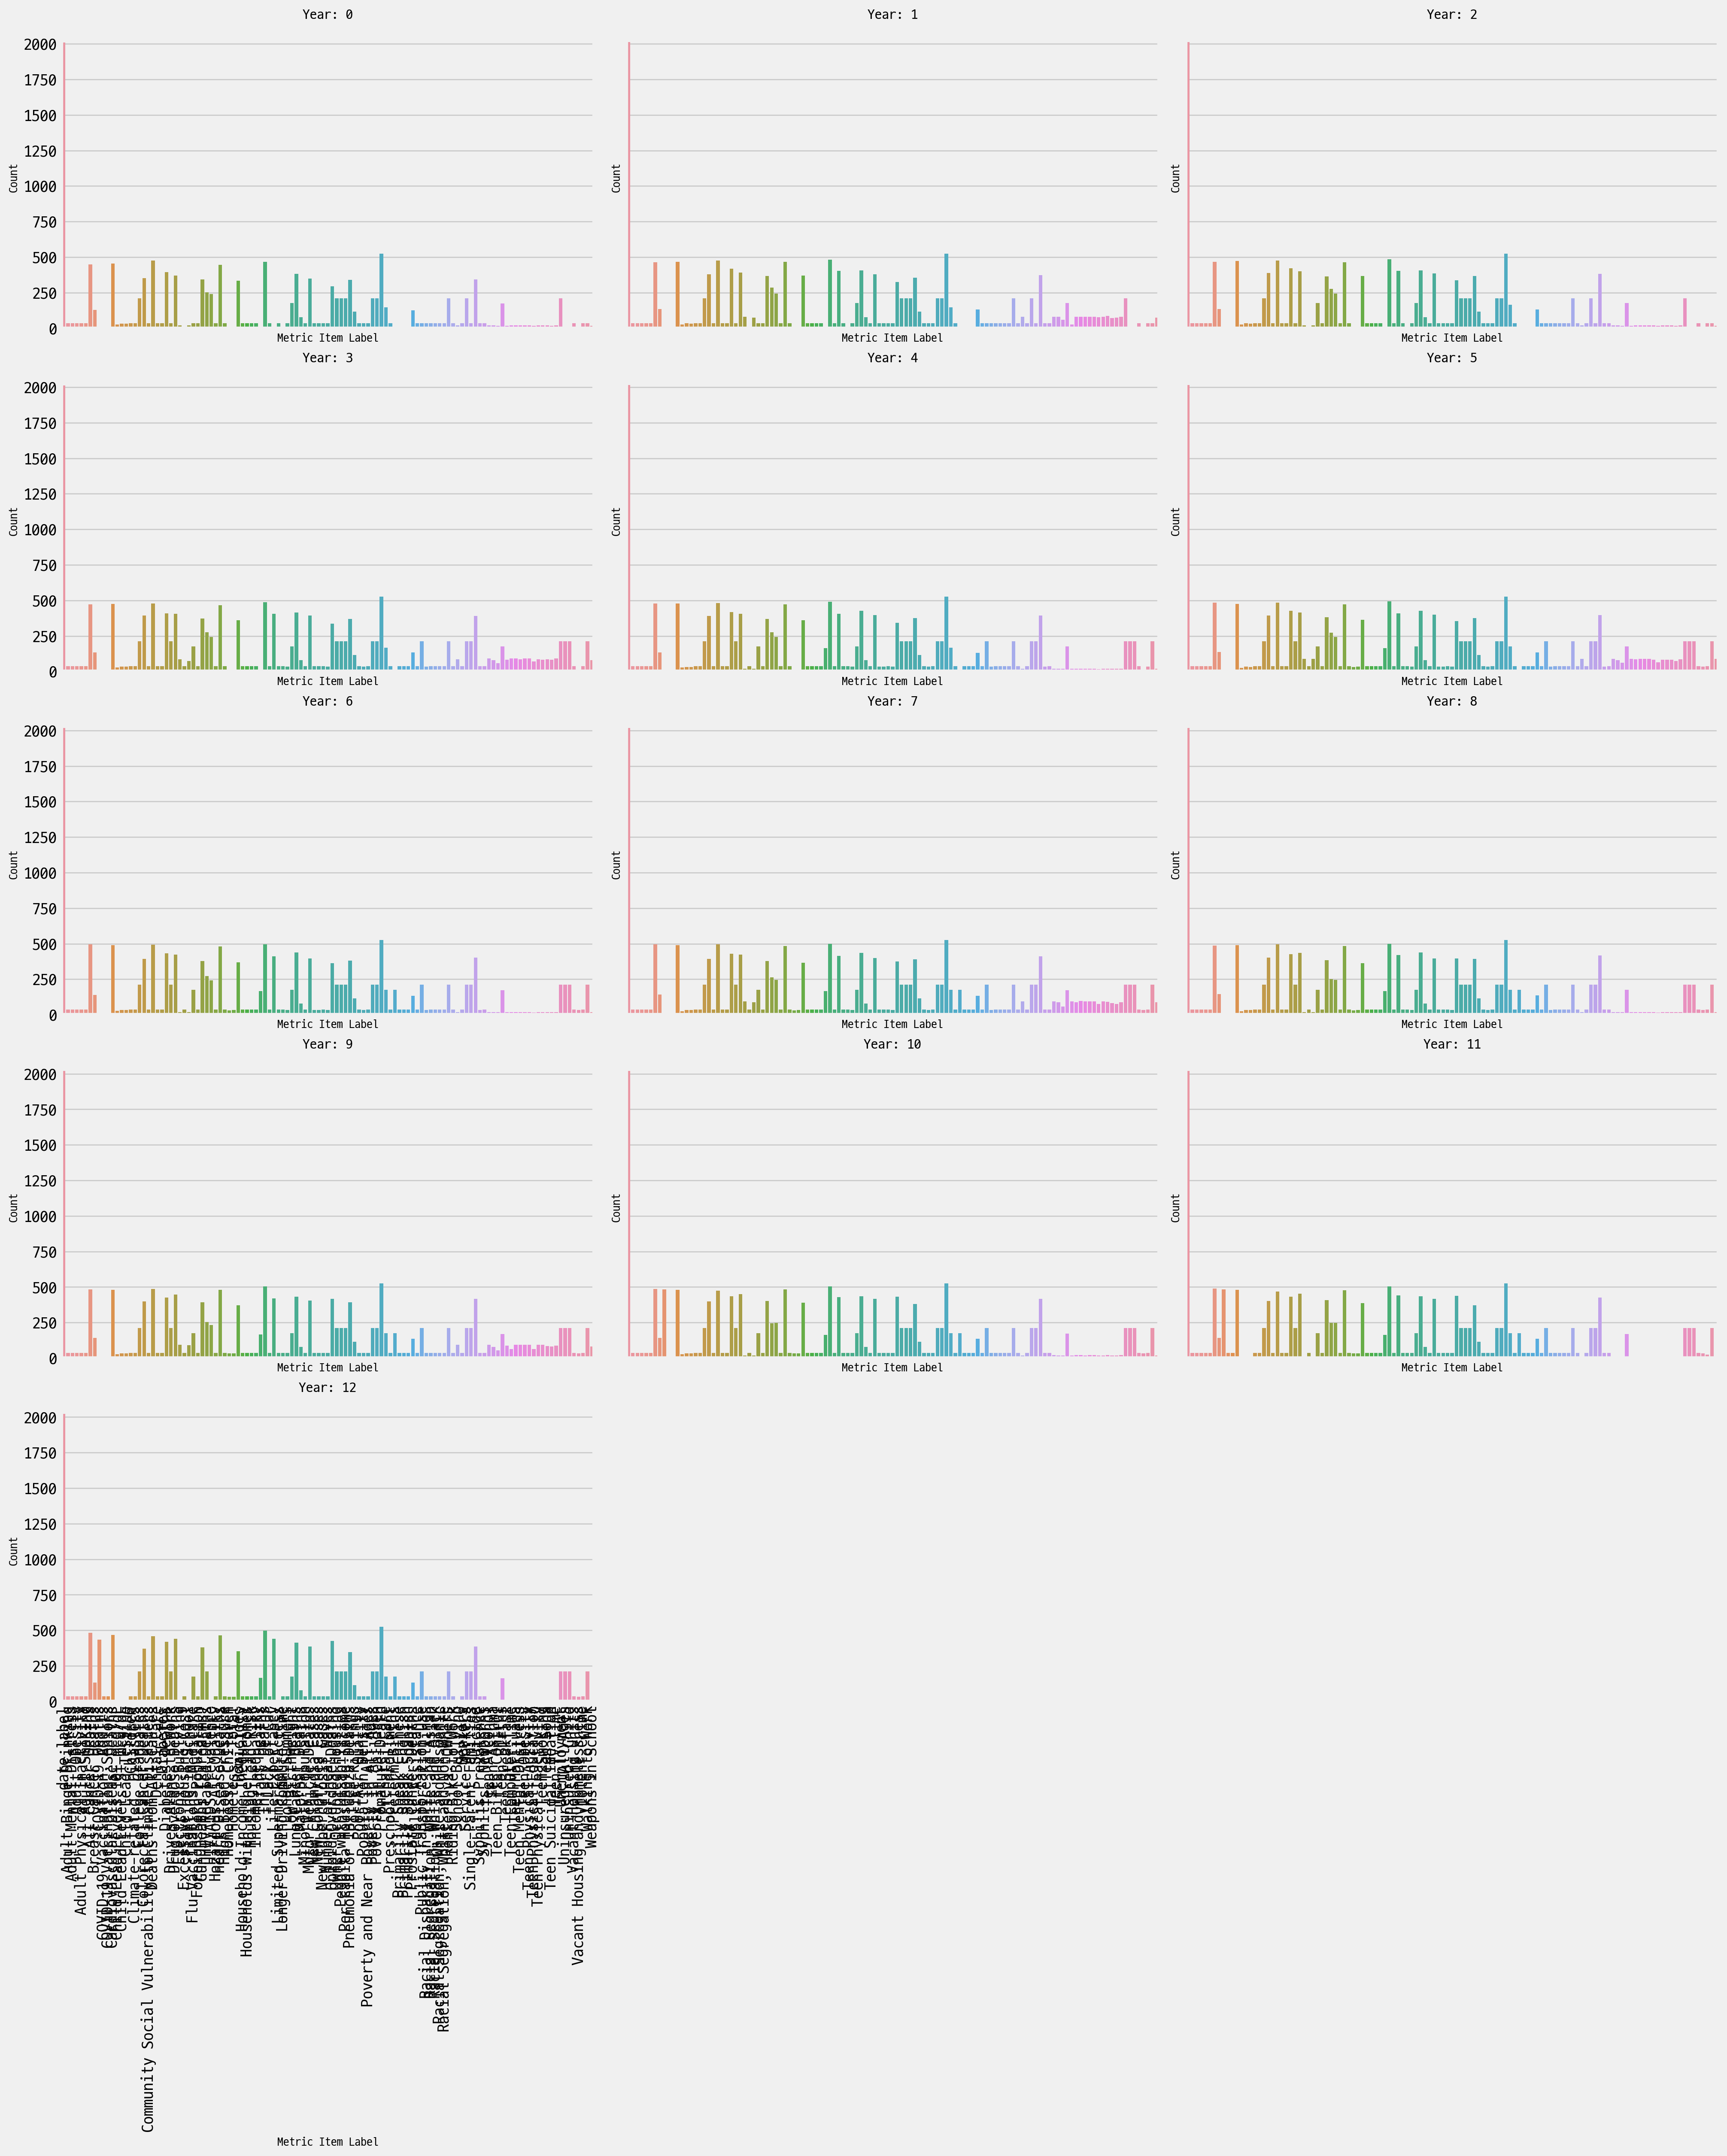

In [80]:
# 시각화
num_years = len(detailed_counts_per_year)
cols = 3
rows = (num_years // cols) + (num_years % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), sharex=True, sharey=True)
axes = axes.flatten()

for i, year in enumerate(detailed_counts_per_year.index):
    ax = axes[i]
    sns.barplot(x=detailed_counts_per_year.columns, y=detailed_counts_per_year.loc[year], ax=ax)
    ax.set_title(f'Year: {year}', fontsize=12)
    ax.set_xlabel('Metric Item Label', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xticklabels(detailed_counts_per_year.columns, rotation=90)

# 빈 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [81]:
# 필요한 컬럼만 선택
selected_columns = ['metric_item_label', 'metric_subcat_label','metric_source_desc_label_fn', 'geo_label_city', 'date_label', 'value_95_ci_low', 'value_95_ci_high']
df_selected = df[selected_columns]

# date_label별로 정렬
df_sorted = df_selected.sort_values(by='date_label')

# date_label을 기준으로 각 항목을 분류
grouped_data = df_sorted.groupby('date_label').apply(lambda x: x.reset_index(drop=True))

# 결과 확인
print(grouped_data.head(20))  # 상위 20개 행만 출력하여 확인

                                    metric_item_label  \
date_label                                              
2010       0   Racial Segregation, White and Hispanic   
           1                   Deaths from All Causes   
           2                   Deaths from All Causes   
           3              Child Lead Levels 5+ mcg/dL   
           4              Child Lead Levels 5+ mcg/dL   
           5              Child Lead Levels 5+ mcg/dL   
           6               Climate-related  Disasters   
           7               Climate-related  Disasters   
           8               Climate-related  Disasters   
           9               Climate-related  Disasters   
           10              Climate-related  Disasters   
           11              Climate-related  Disasters   
           12              Climate-related  Disasters   
           13              Climate-related  Disasters   
           14              Climate-related  Disasters   
           15              Clim

In [82]:
# date_label별로 정렬
df_sorted = df.sort_values(by='date_label')

# 각 연도별로 metric_item_label의 개수를 세분화하여 계산
metric_item_label_counts = df_sorted.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)
metric_item_label_counts.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환

# 각 연도별로 metric_subcat_label의 개수를 세분화하여 계산
metric_subcat_label_counts = df_sorted.groupby(['date_label', 'metric_subcat_label']).size().unstack(fill_value=0)
metric_subcat_label_counts.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환

# 각 연도별로 geo_label_city의 개수를 세분화하여 계산
geo_label_city_counts = df_sorted.groupby(['date_label', 'geo_label_city']).size().unstack(fill_value=0)
geo_label_city_counts.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환

# 결과 확인
print("Metric Item Label Counts:\n", metric_item_label_counts.head())
print("Metric Subcat Label Counts:\n", metric_subcat_label_counts.head())
print("Geo Label City Counts:\n", geo_label_city_counts.head())

Metric Item Label Counts:
 metric_item_label  date_label  Adult Binge Drinking  Adult Mental Distress  \
0                        2010                    36                     36   
1                        2011                    36                     36   
2                        2012                    36                     36   
3                        2013                    36                     36   
4                        2014                    36                     36   

metric_item_label  Adult Obesity  Adult Physical Inactivity  Adult Smoking  \
0                             36                         36             36   
1                             36                         36             36   
2                             36                         36             36   
3                             36                         36             36   
4                             36                         36             36   

metric_item_label  All Cancer Death

C:\Users\jaewonchoi\AppData\Local\Temp\ipykernel_78480\608314759.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\jaewonchoi\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


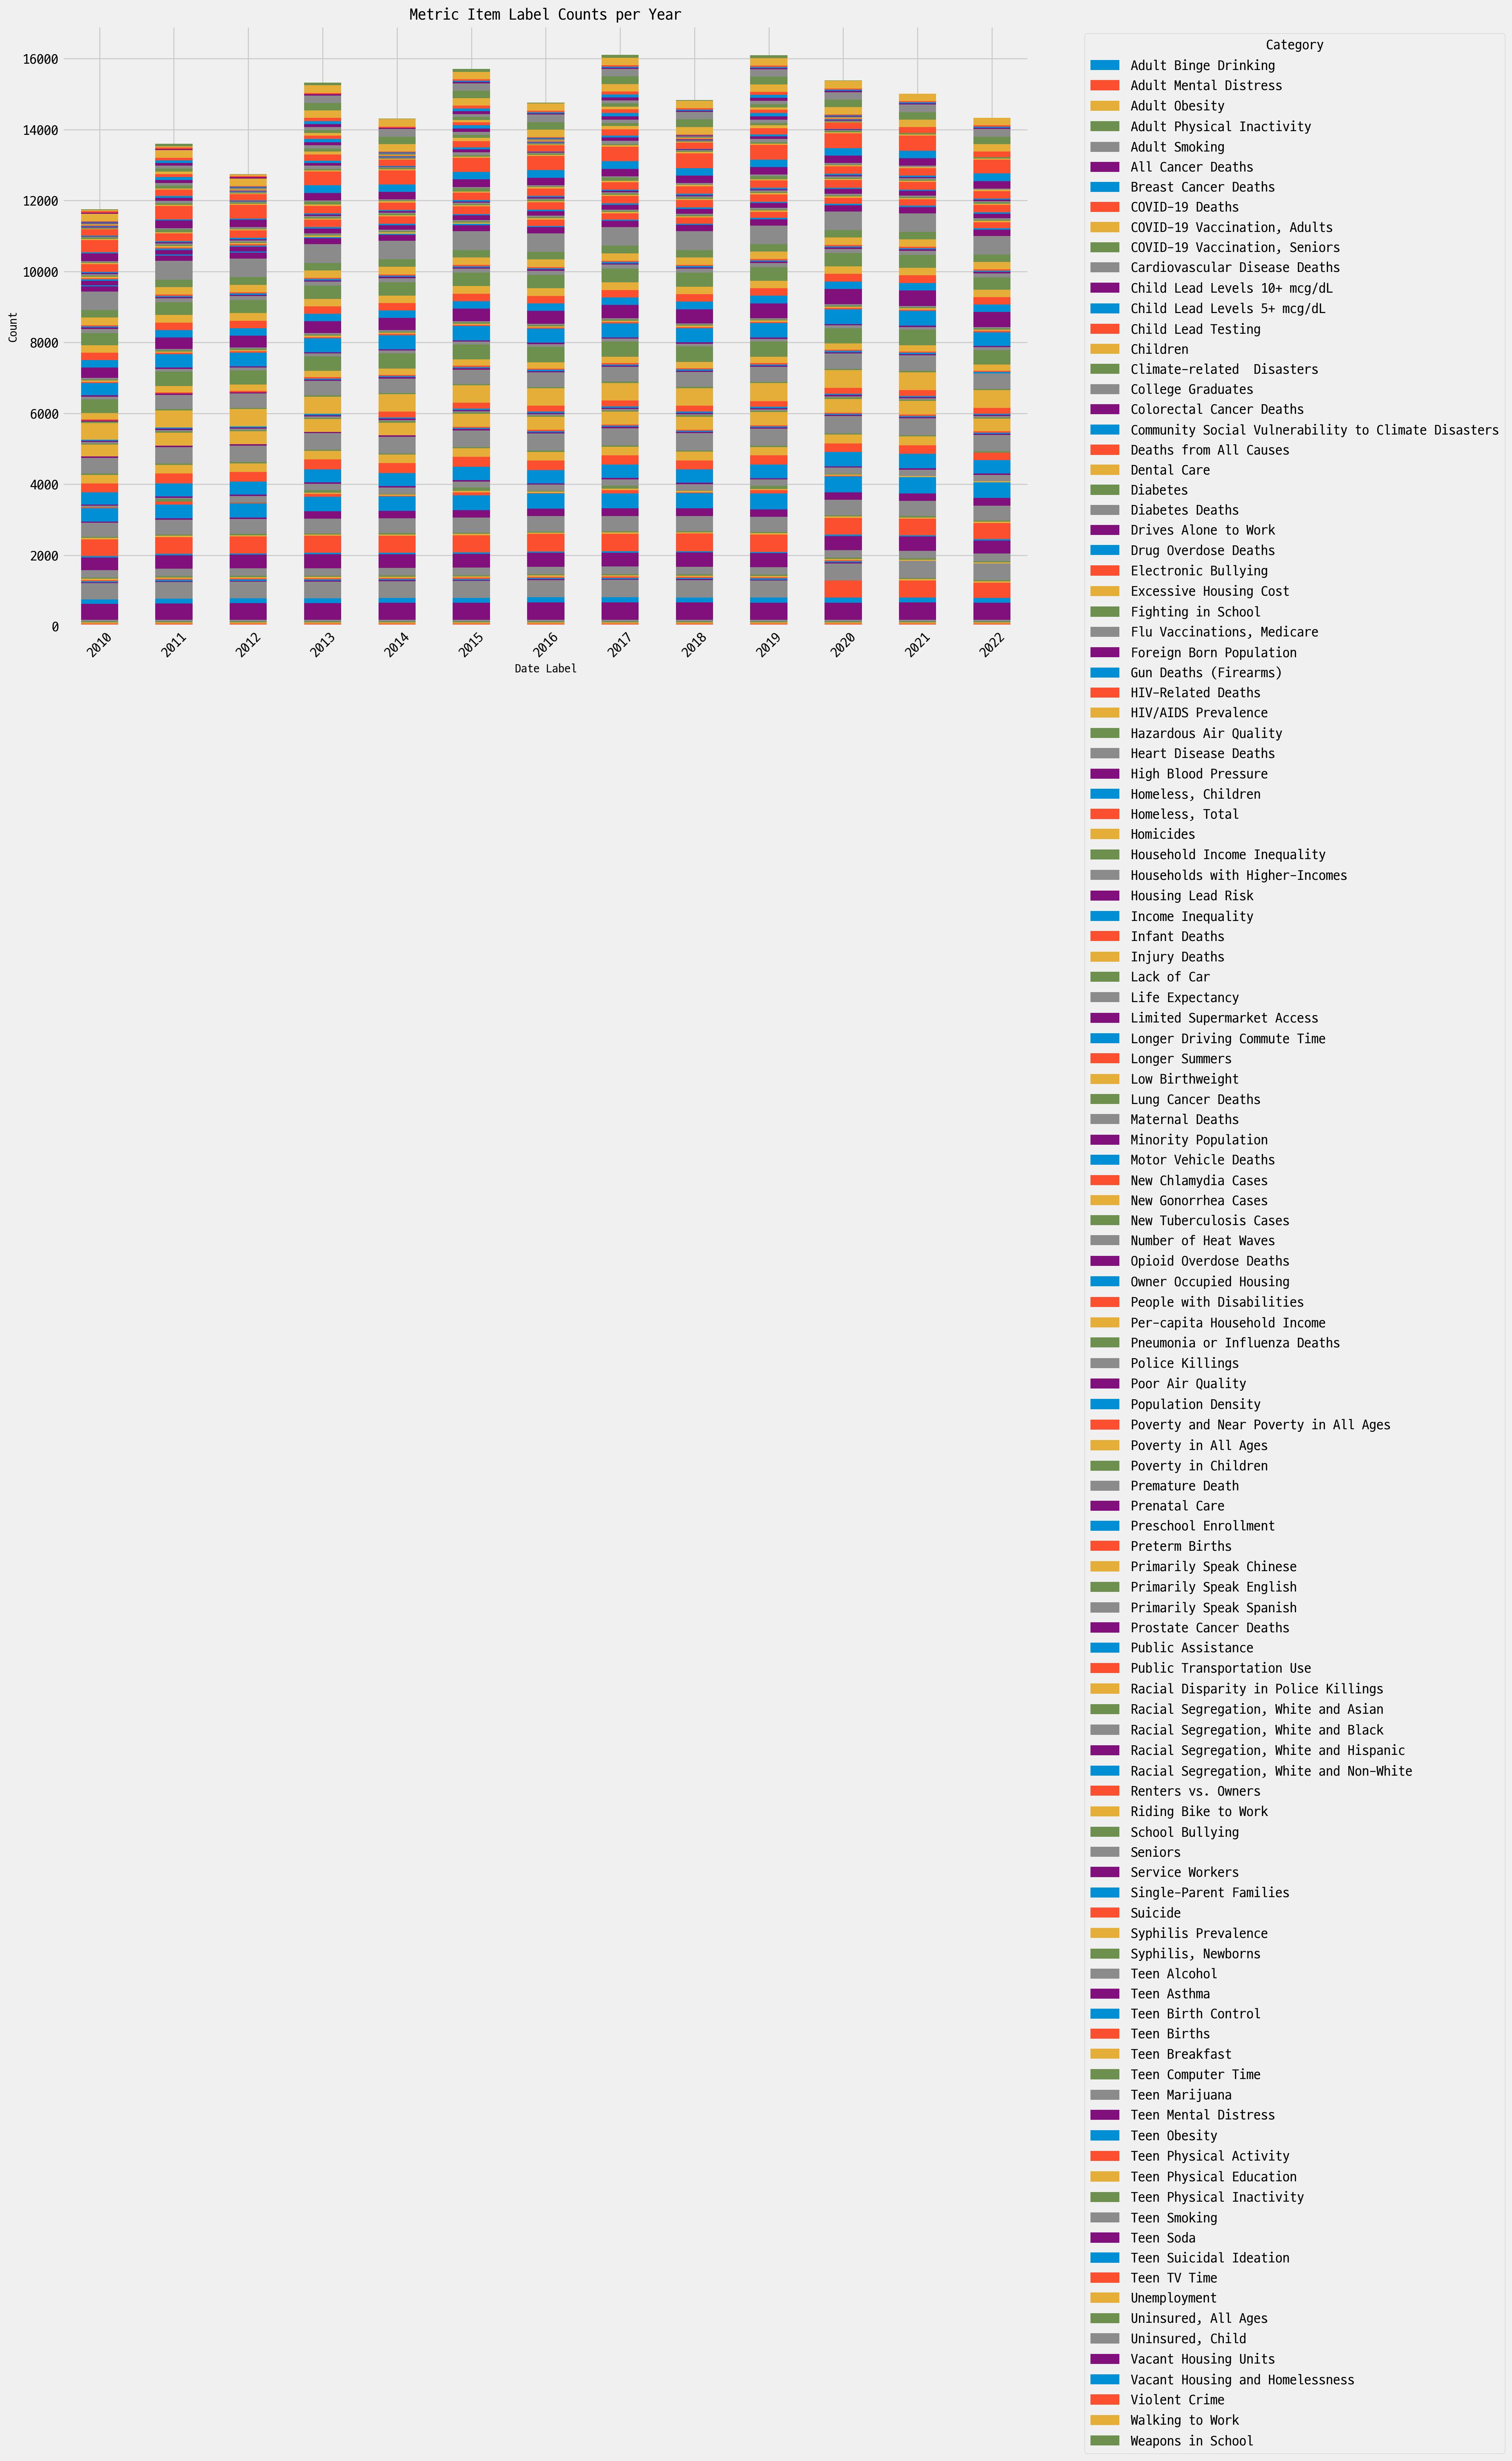

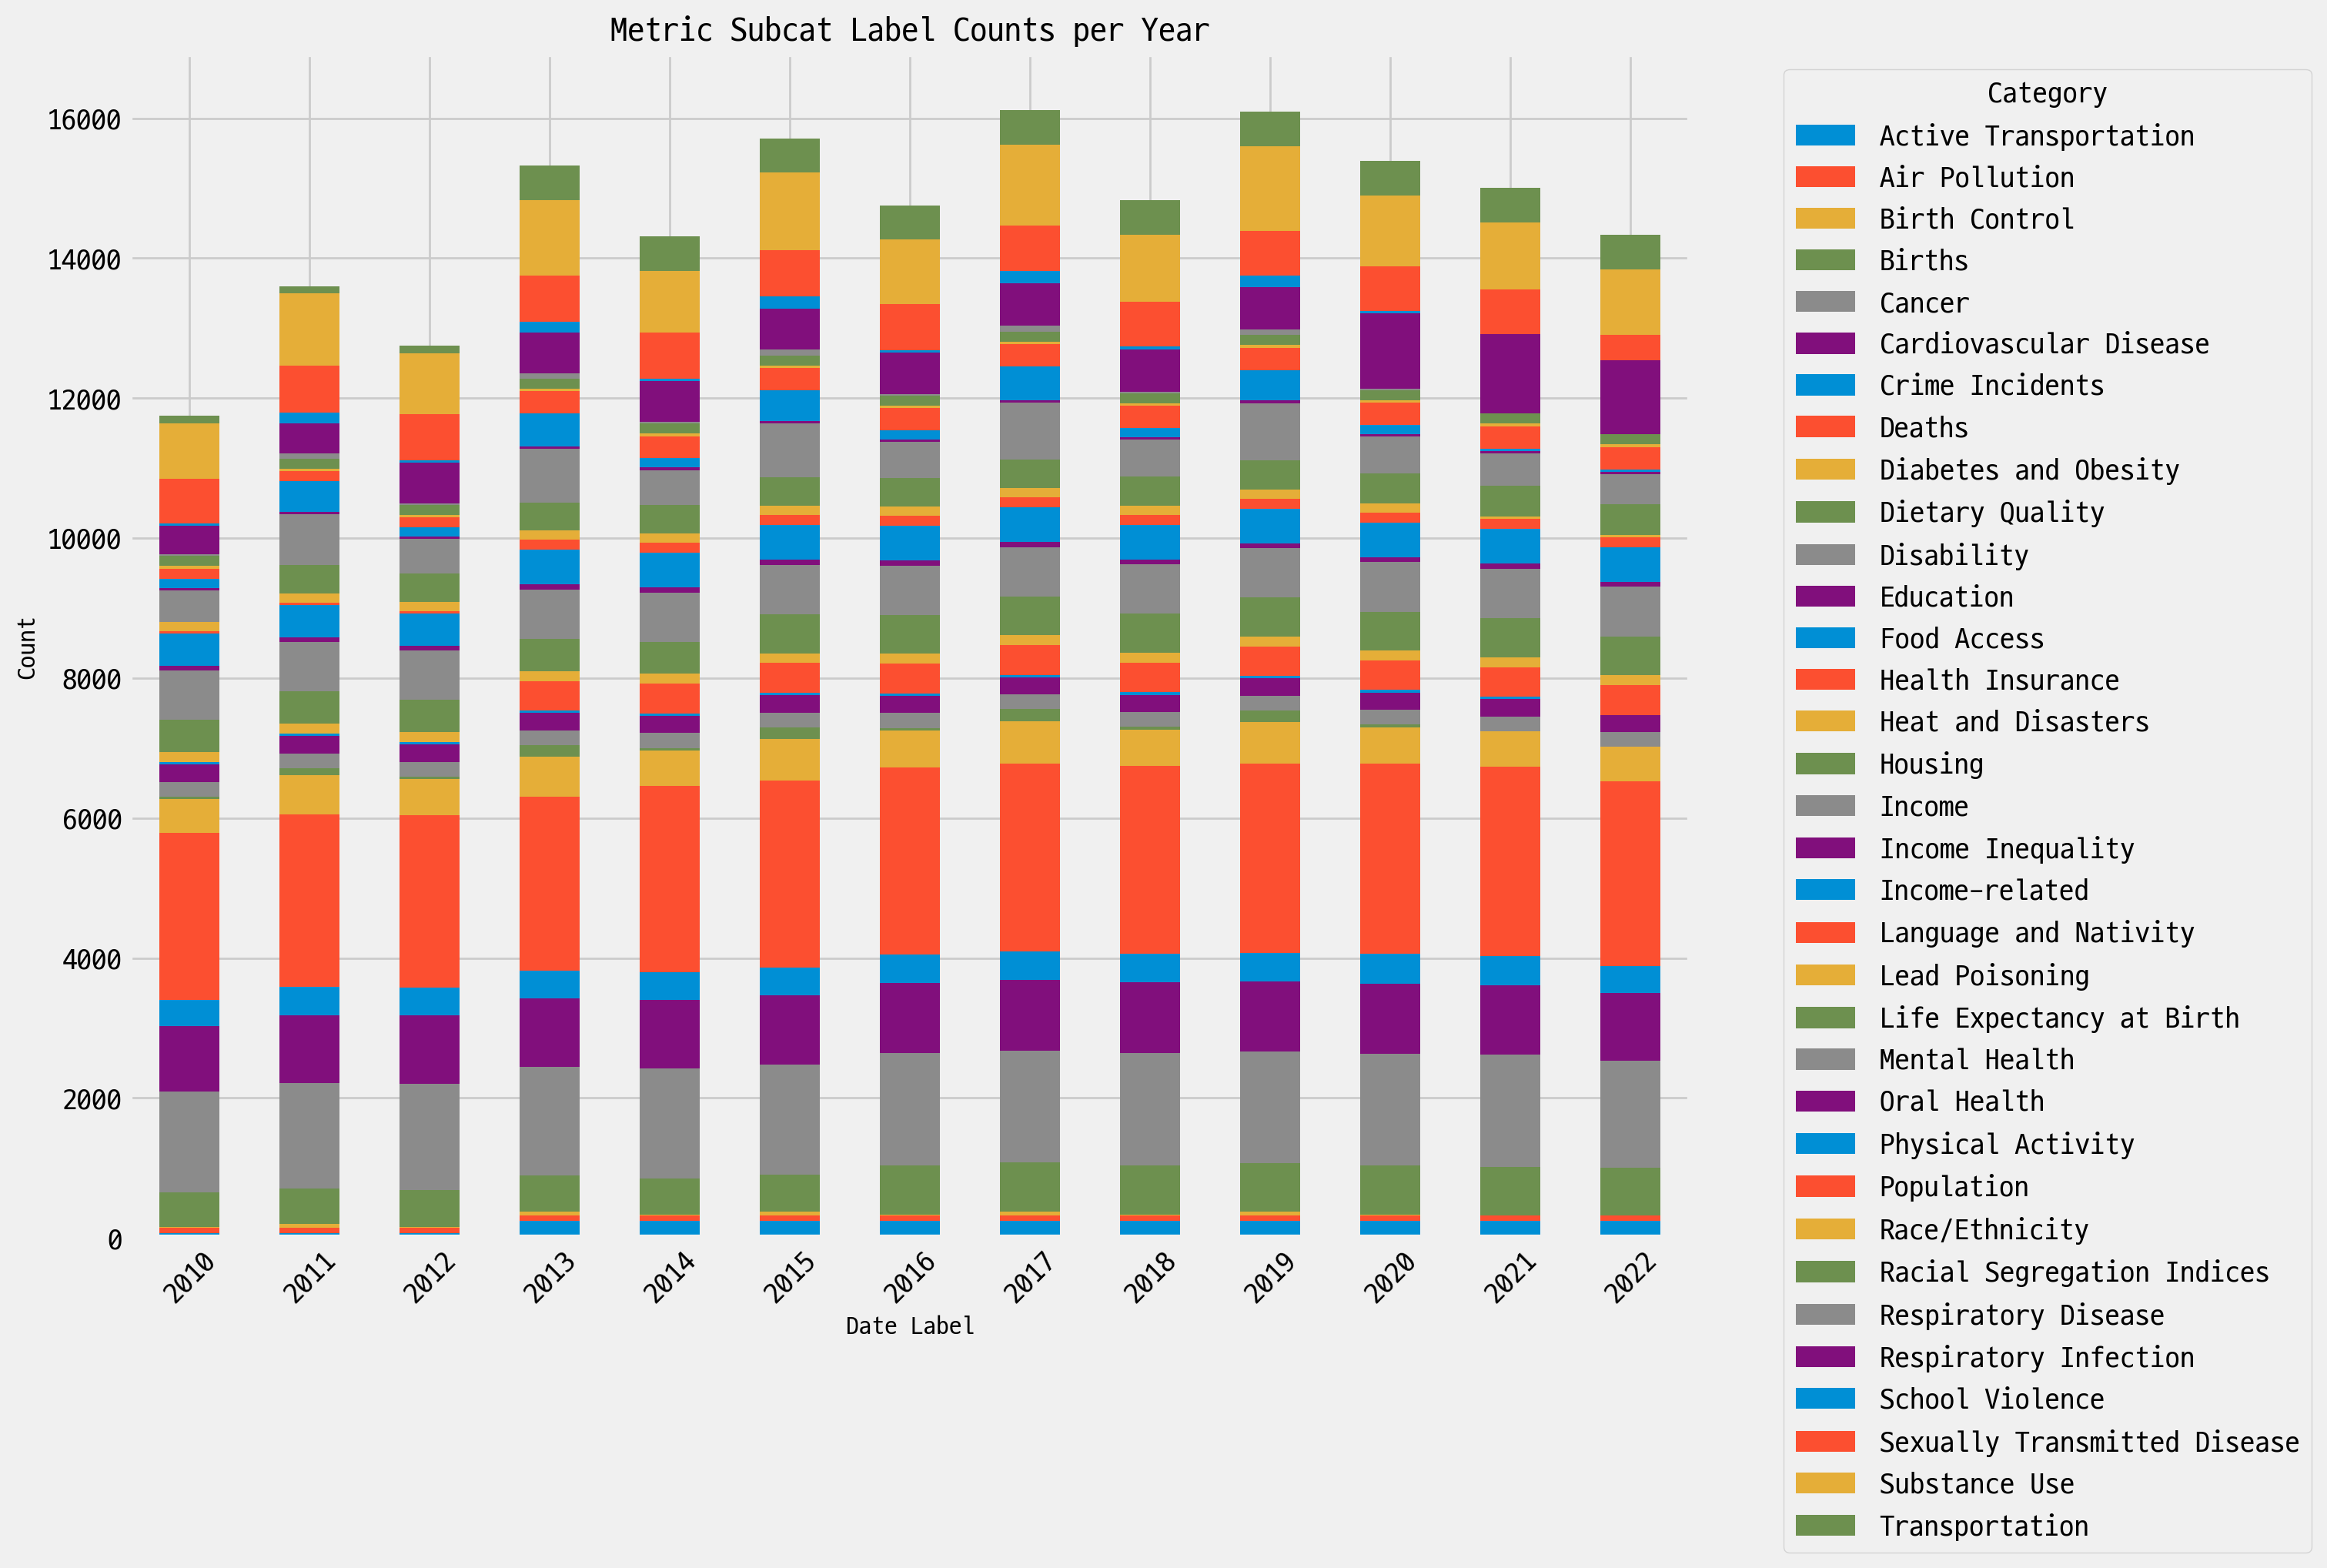

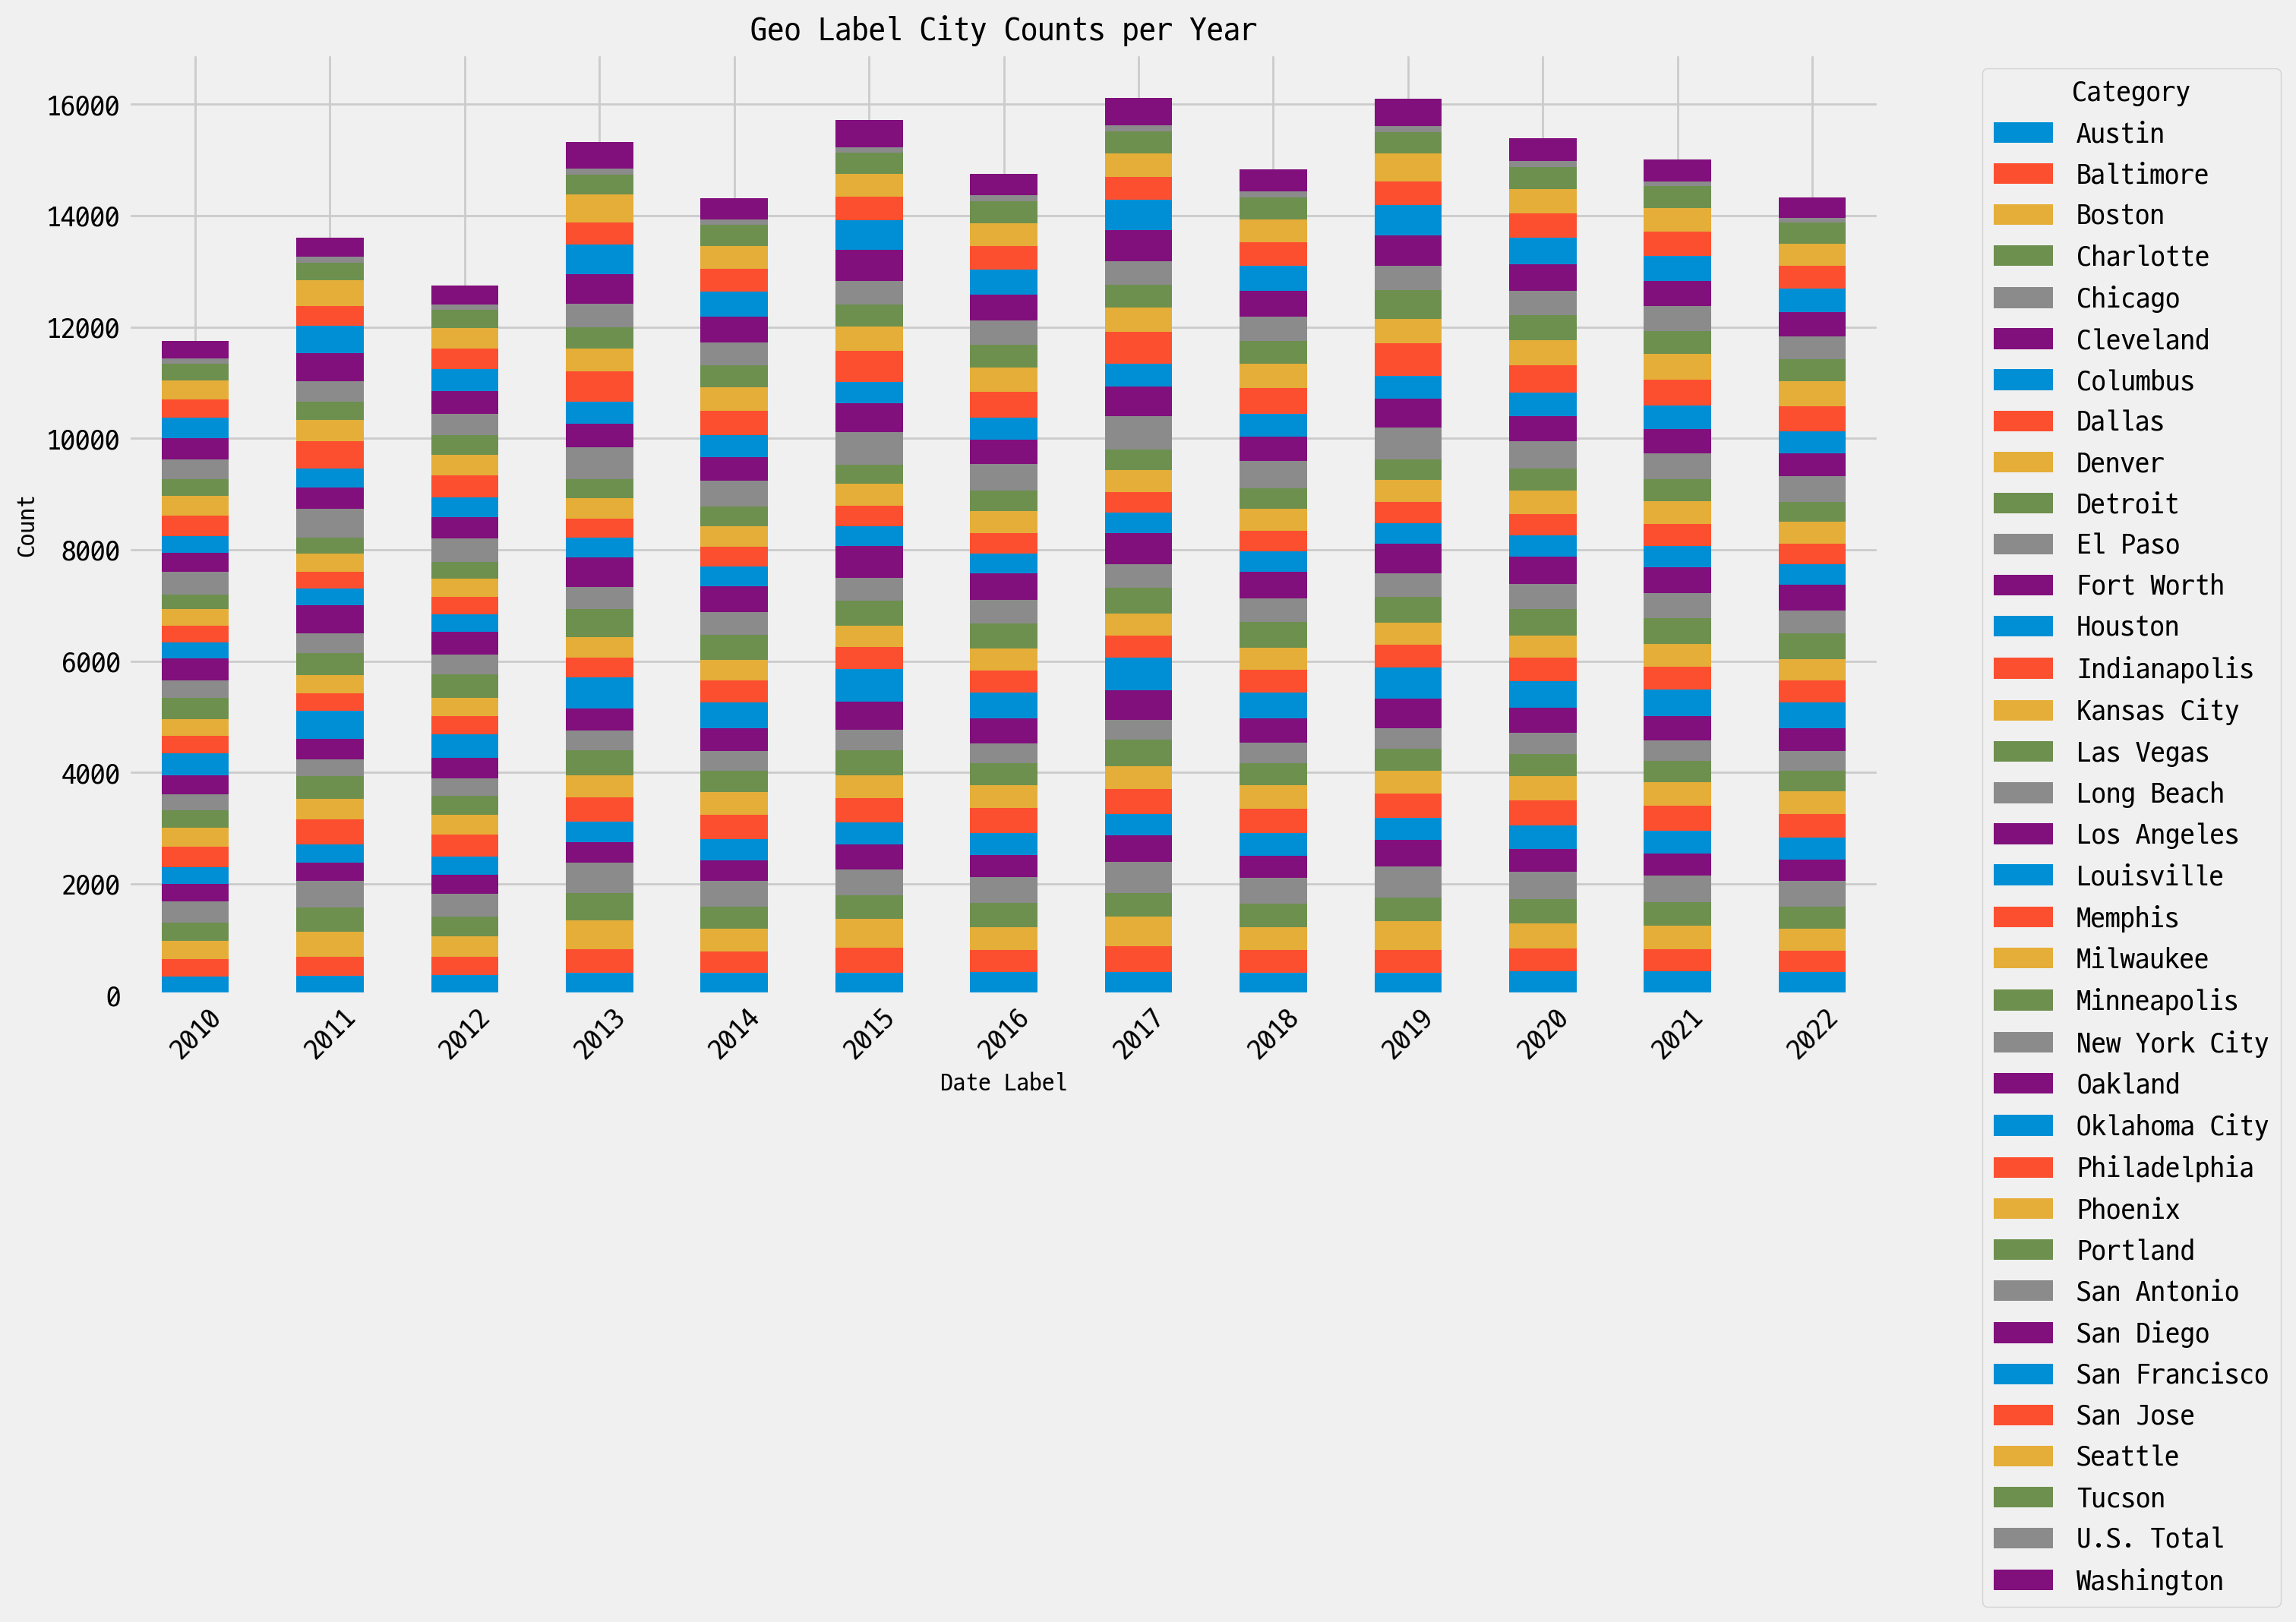

In [83]:
# 시각화를 위한 함수 정의
def plot_bar(data, title, xlabel, ylabel):
    data.set_index('date_label', inplace=True)
    ax = data.plot(kind='bar', stacked=True, figsize=(15, 10))
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 시각화 실행
plot_bar(metric_item_label_counts, 'Metric Item Label Counts per Year', 'Date Label', 'Count')
plot_bar(metric_subcat_label_counts, 'Metric Subcat Label Counts per Year', 'Date Label', 'Count')
plot_bar(geo_label_city_counts, 'Geo Label City Counts per Year', 'Date Label', 'Count')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                189979 non-null  object 
 1   metric_cat_label                 189979 non-null  object 
 2   metric_subcat_label              189979 non-null  object 
 3   metric_item_label_subtitle       189979 non-null  object 
 4   metric_cat_item_yaxis_label      189979 non-null  object 
 5   metric_source_desc_label_fn      189979 non-null  object 
 6   metric_source_desc_label_url_fn  189979 non-null  object 
 7   geo_label_city                   189979 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              189979 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            189979 non-null  float64
 12  da

c:\Users\jaewonchoi\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


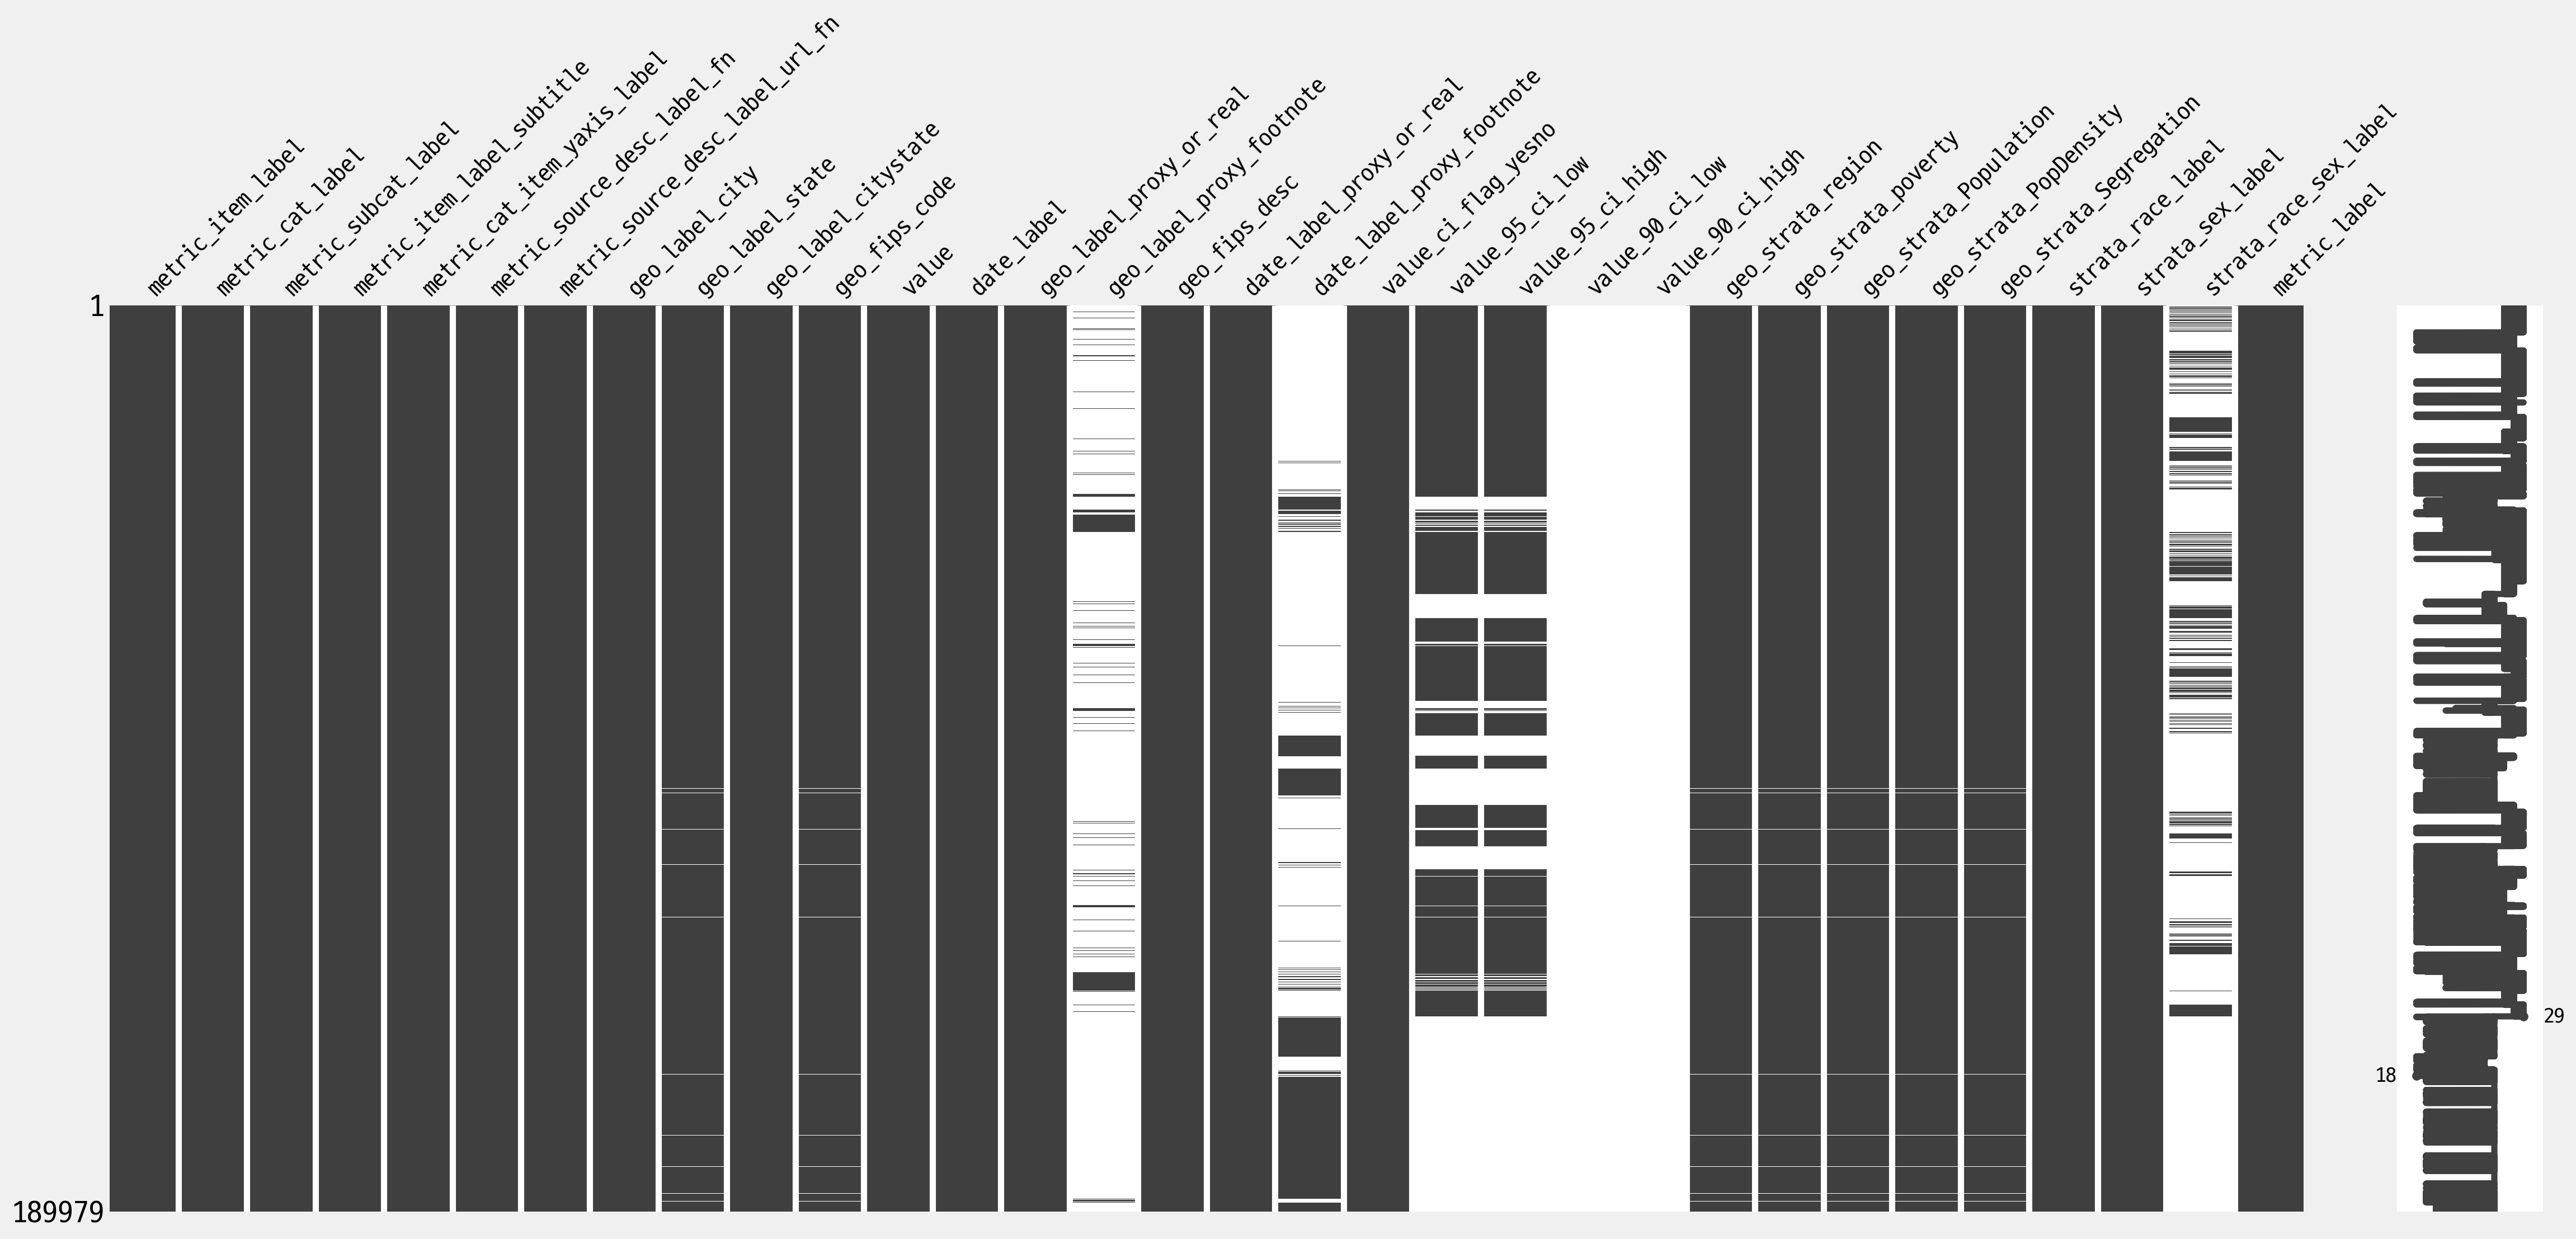

In [87]:
msno.matrix(df)
plt.show()

In [90]:
# 필요한 컬럼만 선택
selected_columns = ['Gender', 'Smoker', 'Count', 'value_95_ci_low', 'value_95_ci_high']
df_selected = df[selected_columns]

# 결측값 처리 (결측값이 있는 행을 제거)
df_selected = df_selected.dropna(subset=['value_95_ci_low', 'value_95_ci_high'])

# 분산도 그리기
plt.figure(figsize=(10, 6))
for gender in df_selected['Gender'].unique():
    subset = df_selected[df_selected['Gender'] == gender]
    plt.errorbar(subset['Smoker'], subset['Count'], 
                 yerr=[subset['Count'] - subset['value_95_ci_low'], subset['value_95_ci_high'] - subset['Count']],
                 fmt='o', capsize=5, label=gender)

plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Count with 95% CI by Gender and Smoker')
plt.legend(title='Gender')
plt.show()

KeyError: "['Gender', 'Smoker', 'Count'] not in index"

C:\Users\jaewonchoi\AppData\Local\Temp\ipykernel_78480\201074599.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\jaewonchoi\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


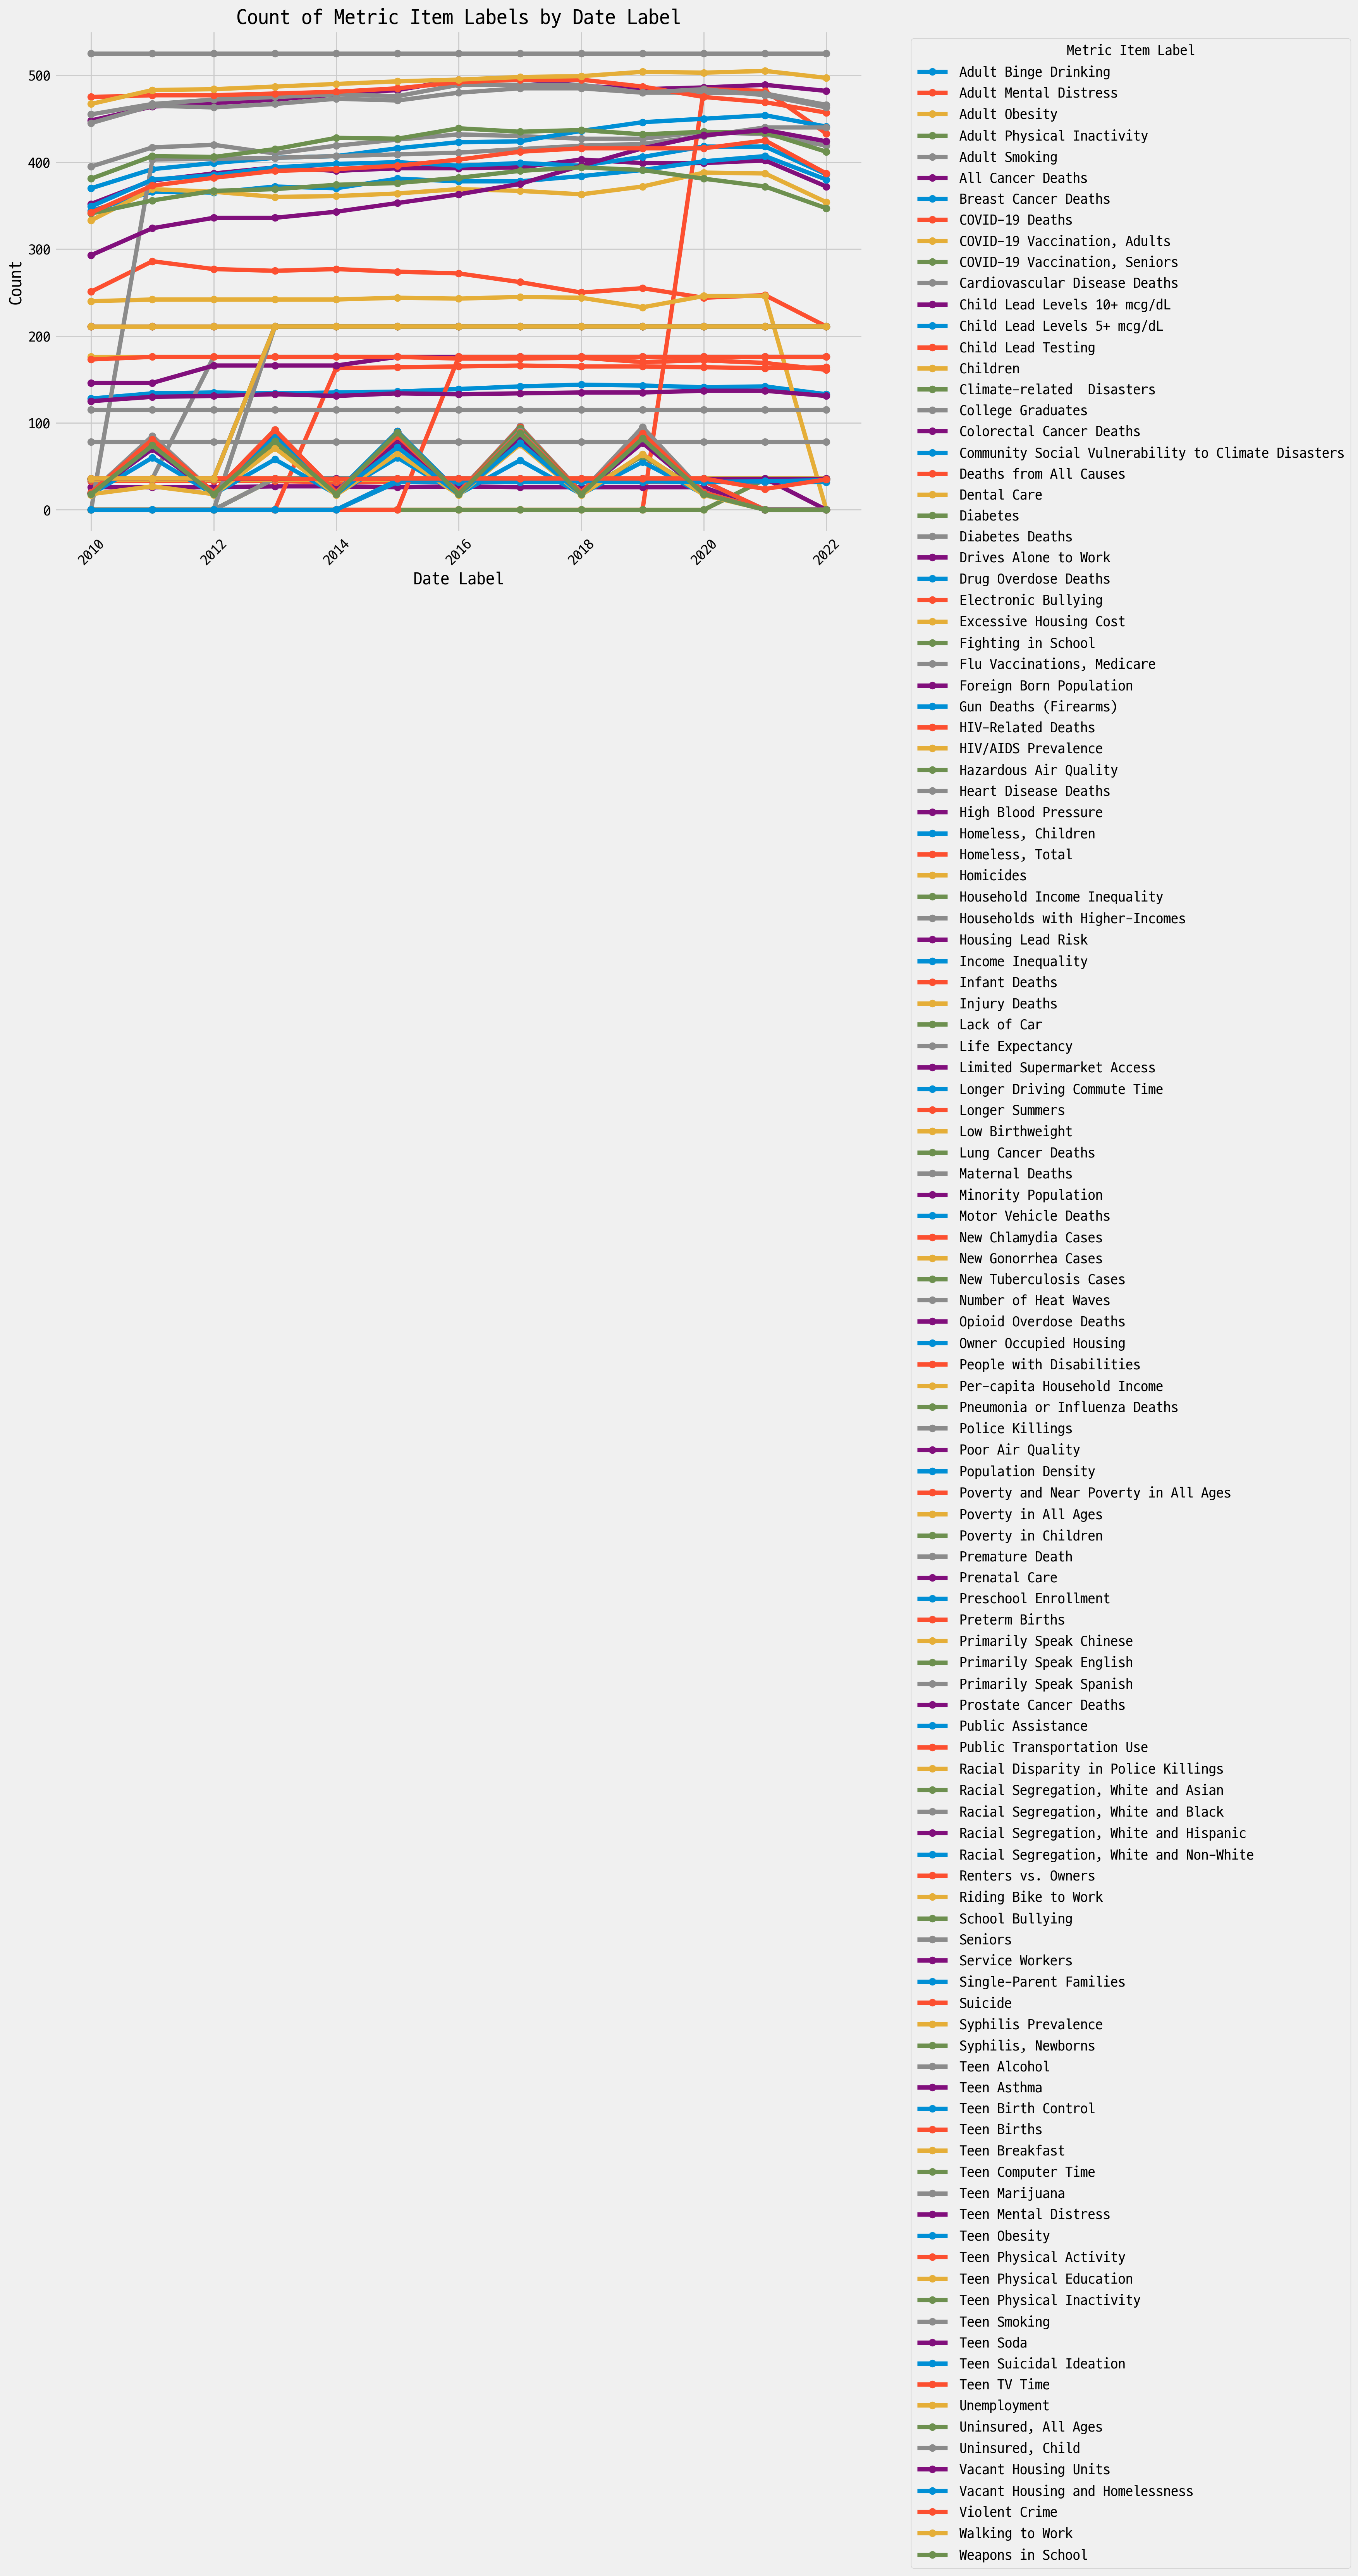

In [92]:
# 필요한 컬럼만 선택
selected_columns = ['metric_item_label', 'metric_subcat_label', 'geo_label_city', 'date_label']
df_selected = df[selected_columns]

# date_label별로 정렬
df_sorted = df_selected.sort_values(by='date_label')

# 각 연도별로 metric_item_label의 개수를 세분화하여 계산
metric_item_label_counts = df_sorted.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)
metric_item_label_counts.reset_index(inplace=True)

# 시각화
plt.figure(figsize=(12, 8))
for metric in metric_item_label_counts.columns[1:]:
    plt.plot(metric_item_label_counts['date_label'], metric_item_label_counts[metric], marker='o', label=metric)

plt.xlabel('Date Label')
plt.ylabel('Count')
plt.title('Count of Metric Item Labels by Date Label')
plt.legend(title='Metric Item Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
# 필요한 컬럼만 선택
selected_columns = ['metric_item_label', 'metric_subcat_label', 'geo_label_city', 'date_label']
df_selected = df[selected_columns]

# 결측값 처리 (결측값을 -1로 채움)
df_selected.fillna(-1, inplace=True)

# 카테고리형 변수 인코딩
label_encoders = {}
for column in ['metric_item_label', 'metric_subcat_label', 'geo_label_city']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# X와 Y 분리
X = df_selected.drop('date_label', axis=1)
y = df_selected['date_label']

# Y 라벨 인코딩
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# 학습용과 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 예측값과 실제값 비교
comparison_df = pd.DataFrame({'Actual': y_le.inverse_transform(y_test), 'Predicted': y_le.inverse_transform(np.round(y_pred).astype(int))})
print(comparison_df.head())

Mean Squared Error: 13.233037205622708
R^2 Score: 0.0002866761753047564
   Actual  Predicted
0    2022       2016
1    2018       2016
2    2017       2016
3    2017       2016
4    2011       2016


C:\Users\jaewonchoi\AppData\Local\Temp\ipykernel_78480\3872611321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(-1, inplace=True)
C:\Users\jaewonchoi\AppData\Local\Temp\ipykernel_78480\3872611321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])


In [130]:
# 'metric_cat_item_yaxis_label' 컬럼을 기준으로 데이터를 정렬
sorted_data_by_metric = df.sort_values(by='metric_cat_item_yaxis_label')

# 첫 10개의 데이터를 확인
sorted_data_by_metric.head(10)

metric_item_label     metric_cat_label  \
113909  HIV/AIDS Prevalence  Infectious Diseases   
114528  HIV/AIDS Prevalence  Infectious Diseases   
114529  HIV/AIDS Prevalence  Infectious Diseases   
114530  HIV/AIDS Prevalence  Infectious Diseases   
114531  HIV/AIDS Prevalence  Infectious Diseases   
114532  HIV/AIDS Prevalence  Infectious Diseases   
114533  HIV/AIDS Prevalence  Infectious Diseases   
114527  HIV/AIDS Prevalence  Infectious Diseases   
114534  HIV/AIDS Prevalence  Infectious Diseases   
114536  HIV/AIDS Prevalence  Infectious Diseases   

                 metric_subcat_label  \
113909  Sexually Transmitted Disease   
114528  Sexually Transmitted Disease   
114529  Sexually Transmitted Disease   
114530  Sexually Transmitted Disease   
114531  Sexually Transmitted Disease   
114532  Sexually Transmitted Disease   
114533  Sexually Transmitted Disease   
114527  Sexually Transmitted Disease   
114534  Sexually Transmitted Disease   
114536  Sexually Transmitted Disease   

                               metric_item_label_subtitle  \
113909  Persons living with HIV/AIDS (per 100,000 popu...   
114528  Persons living with HIV/AIDS (per 100,000 popu...   
114529  Persons living with HIV/AIDS (per 100,000 popu...   
114530  Persons living with HIV/AIDS (per 100,000 popu...   
114531  Persons living with HIV/AIDS (per 100,000 popu...   
114532  Persons living with HIV/AIDS (per 100,000 popu...   
114533  Persons living with HIV/AIDS (per 100,000 popu...   
114527  Persons living with HIV/AIDS (per 100,000 popu...   
114534  Persons living with HIV/AIDS (per 100,000 popu...   
114536  Persons living with HIV/AIDS (per 100,000 popu...   

       metric_cat_item_yaxis_label  \
113909           Cases per 100,000   
114528           Cases per 100,000   
114529           Cases per 100,000   
114530           Cases per 100,000   
114531           Cases per 100,000   
114532           Cases per 100,000   
114533           Cases per 100,000   
114527           Cases per 100,000   
114534           Cases per 100,000   
114536           Cases per 100,000   

                              metric_source_desc_label_fn  \
113909  National Center for HIV/AIDS, Viral Hepatitis,...   
114528  National Center for HIV/AIDS, Viral Hepatitis,...   
114529  National Center for HIV/AIDS, Viral Hepatitis,...   
114530  National Center for HIV/AIDS, Viral Hepatitis,...   
114531  National Center for HIV/AIDS, Viral Hepatitis,...   
114532  National Center for HIV/AIDS, Viral Hepatitis,...   
114533  National Center for HIV/AIDS, Viral Hepatitis,...   
114527  National Center for HIV/AIDS, Viral Hepatitis,...   
114534  National Center for HIV/AIDS, Viral Hepatitis,...   
114536  National Center for HIV/AIDS, Viral Hepatitis,...   

                    metric_source_desc_label_url_fn geo_label_city  \
113909  https://www.cdc.gov/nchhstp/atlas/index.htm    Kansas City   
114528  https://www.cdc.gov/nchhstp/atlas/index.htm       San Jose   
114529  https://www.cdc.gov/nchhstp/atlas/index.htm         Tucson   
114530  https://www.cdc.gov/nchhstp/atlas/index.htm         Austin   
114531  https://www.cdc.gov/nchhstp/atlas/index.htm     Long Beach   
114532  https://www.cdc.gov/nchhstp/atlas/index.htm        Oakland   
114533  https://www.cdc.gov/nchhstp/atlas/index.htm        Oakland   
114527  https://www.cdc.gov/nchhstp/atlas/index.htm  San Francisco   
114534  https://www.cdc.gov/nchhstp/atlas/index.htm        Chicago   
114536  https://www.cdc.gov/nchhstp/atlas/index.htm        Houston   

       geo_label_state geo_label_citystate  ...  value_90_ci_high  \
113909              MO     Kansas City, MO  ...               NaN   
114528              CA        San Jose, CA  ...               NaN   
114529              AZ          Tucson, AZ  ...               NaN   
114530              TX          Austin, TX  ...               NaN   
114531              CA      Long Beach, CA  ...               NaN   
114532              CA         Oakland, CA  ... 

In [127]:
# 'metric_cat_item_yaxis_label' 컬럼을 기준으로 데이터를 정렬
sorted_data_by_metric = df.sort_values(by='metric_cat_item_yaxis_label')

# 정렬된 데이터를 'metric_cat_item_yaxis_label' 컬럼의 요소별로 그룹화
grouped_data_by_metric = sorted_data_by_metric.groupby('metric_cat_item_yaxis_label')

# 각 그룹의 데이터를 확인
for name, group in grouped_data_by_metric:
    print(f"Group: {name}")
    print(group.head(10))

Group: Cases per 100,000
          metric_item_label     metric_cat_label  \
113909  HIV/AIDS Prevalence  Infectious Diseases   
114528  HIV/AIDS Prevalence  Infectious Diseases   
114529  HIV/AIDS Prevalence  Infectious Diseases   
114530  HIV/AIDS Prevalence  Infectious Diseases   
114531  HIV/AIDS Prevalence  Infectious Diseases   
114532  HIV/AIDS Prevalence  Infectious Diseases   
114533  HIV/AIDS Prevalence  Infectious Diseases   
114527  HIV/AIDS Prevalence  Infectious Diseases   
114534  HIV/AIDS Prevalence  Infectious Diseases   
114536  HIV/AIDS Prevalence  Infectious Diseases   

                 metric_subcat_label  \
113909  Sexually Transmitted Disease   
114528  Sexually Transmitted Disease   
114529  Sexually Transmitted Disease   
114530  Sexually Transmitted Disease   
114531  Sexually Transmitted Disease   
114532  Sexually Transmitted Disease   
114533  Sexually Transmitted Disease   
114527  Sexually Transmitted Disease   
114534  Sexually Transmitted Disease   
11

### to do
    1. 1차정리 데이터 pivot table화하기
        - pvtb: row, col; 원래 있던것
    2. df: city, date, label, value, unit
    3. unit 기준 나누기
    4. pvtb변환

In [100]:
# 'metric_cat_item_yaxis_label' 컬럼을 기준으로 데이터를 정렬하고 그룹화합니다.
sorted_data_by_metric = df.sort_values(by='metric_cat_item_yaxis_label')
grouped_data_by_metric = sorted_data_by_metric.groupby('metric_cat_item_yaxis_label')

# 각 그룹의 분산도를 계산합니다.
variance_by_group = grouped_data_by_metric.var()

# 결과를 확인합니다.
print(variance_by_group)

                                              geo_fips_code         value  \
metric_cat_item_yaxis_label                                                 
Cases per 100,000                              2.897743e+12  3.189616e+05   
Cases per 100,000 live births                  2.865283e+12  1.469336e+03   
Days                                           2.862131e+12  3.092051e+02   
Dollars                                        2.860034e+12  2.715708e+08   
Incidents per 100,000                          2.845937e+12  7.716362e+04   
Lower is better                                2.860034e+12  6.248063e+02   
Number                                         2.865283e+12  2.453386e+00   
Per 1,000                                      2.904076e+12  9.973300e+00   
Per 1,000 females aged 15-19                   2.868952e+12  4.199862e+02   
Per 1,000,000                                  2.917764e+12  4.554266e+00   
Per 100,000                                    2.925662e+12  4.640036e+04   

C:\Users\jaewonchoi\AppData\Local\Temp\ipykernel_78480\3943916997.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variance_by_group = grouped_data_by_metric.var()


In [128]:
# 데이터프레임의 컬럼 확인
columns = df.columns
columns

Index(['metric_item_label', 'metric_cat_label', 'metric_subcat_label',
       'metric_item_label_subtitle', 'metric_cat_item_yaxis_label',
       'metric_source_desc_label_fn', 'metric_source_desc_label_url_fn',
       'geo_label_city', 'geo_label_state', 'geo_label_citystate',
       'geo_fips_code', 'value', 'date_label', 'geo_label_proxy_or_real',
       'geo_label_proxy_footnote', 'geo_fips_desc', 'date_label_proxy_or_real',
       'date_label_proxy_footnote', 'value_ci_flag_yesno', 'value_95_ci_low',
       'value_95_ci_high', 'value_90_ci_low', 'value_90_ci_high',
       'geo_strata_region', 'geo_strata_poverty', 'geo_strata_Population',
       'geo_strata_PopDensity', 'geo_strata_Segregation', 'strata_race_label',
       'strata_sex_label', 'strata_race_sex_label', 'metric_label'],
      dtype='object')

In [120]:
## x축을 metric_item_label로, 너무 많으니까 좀 줄여서.

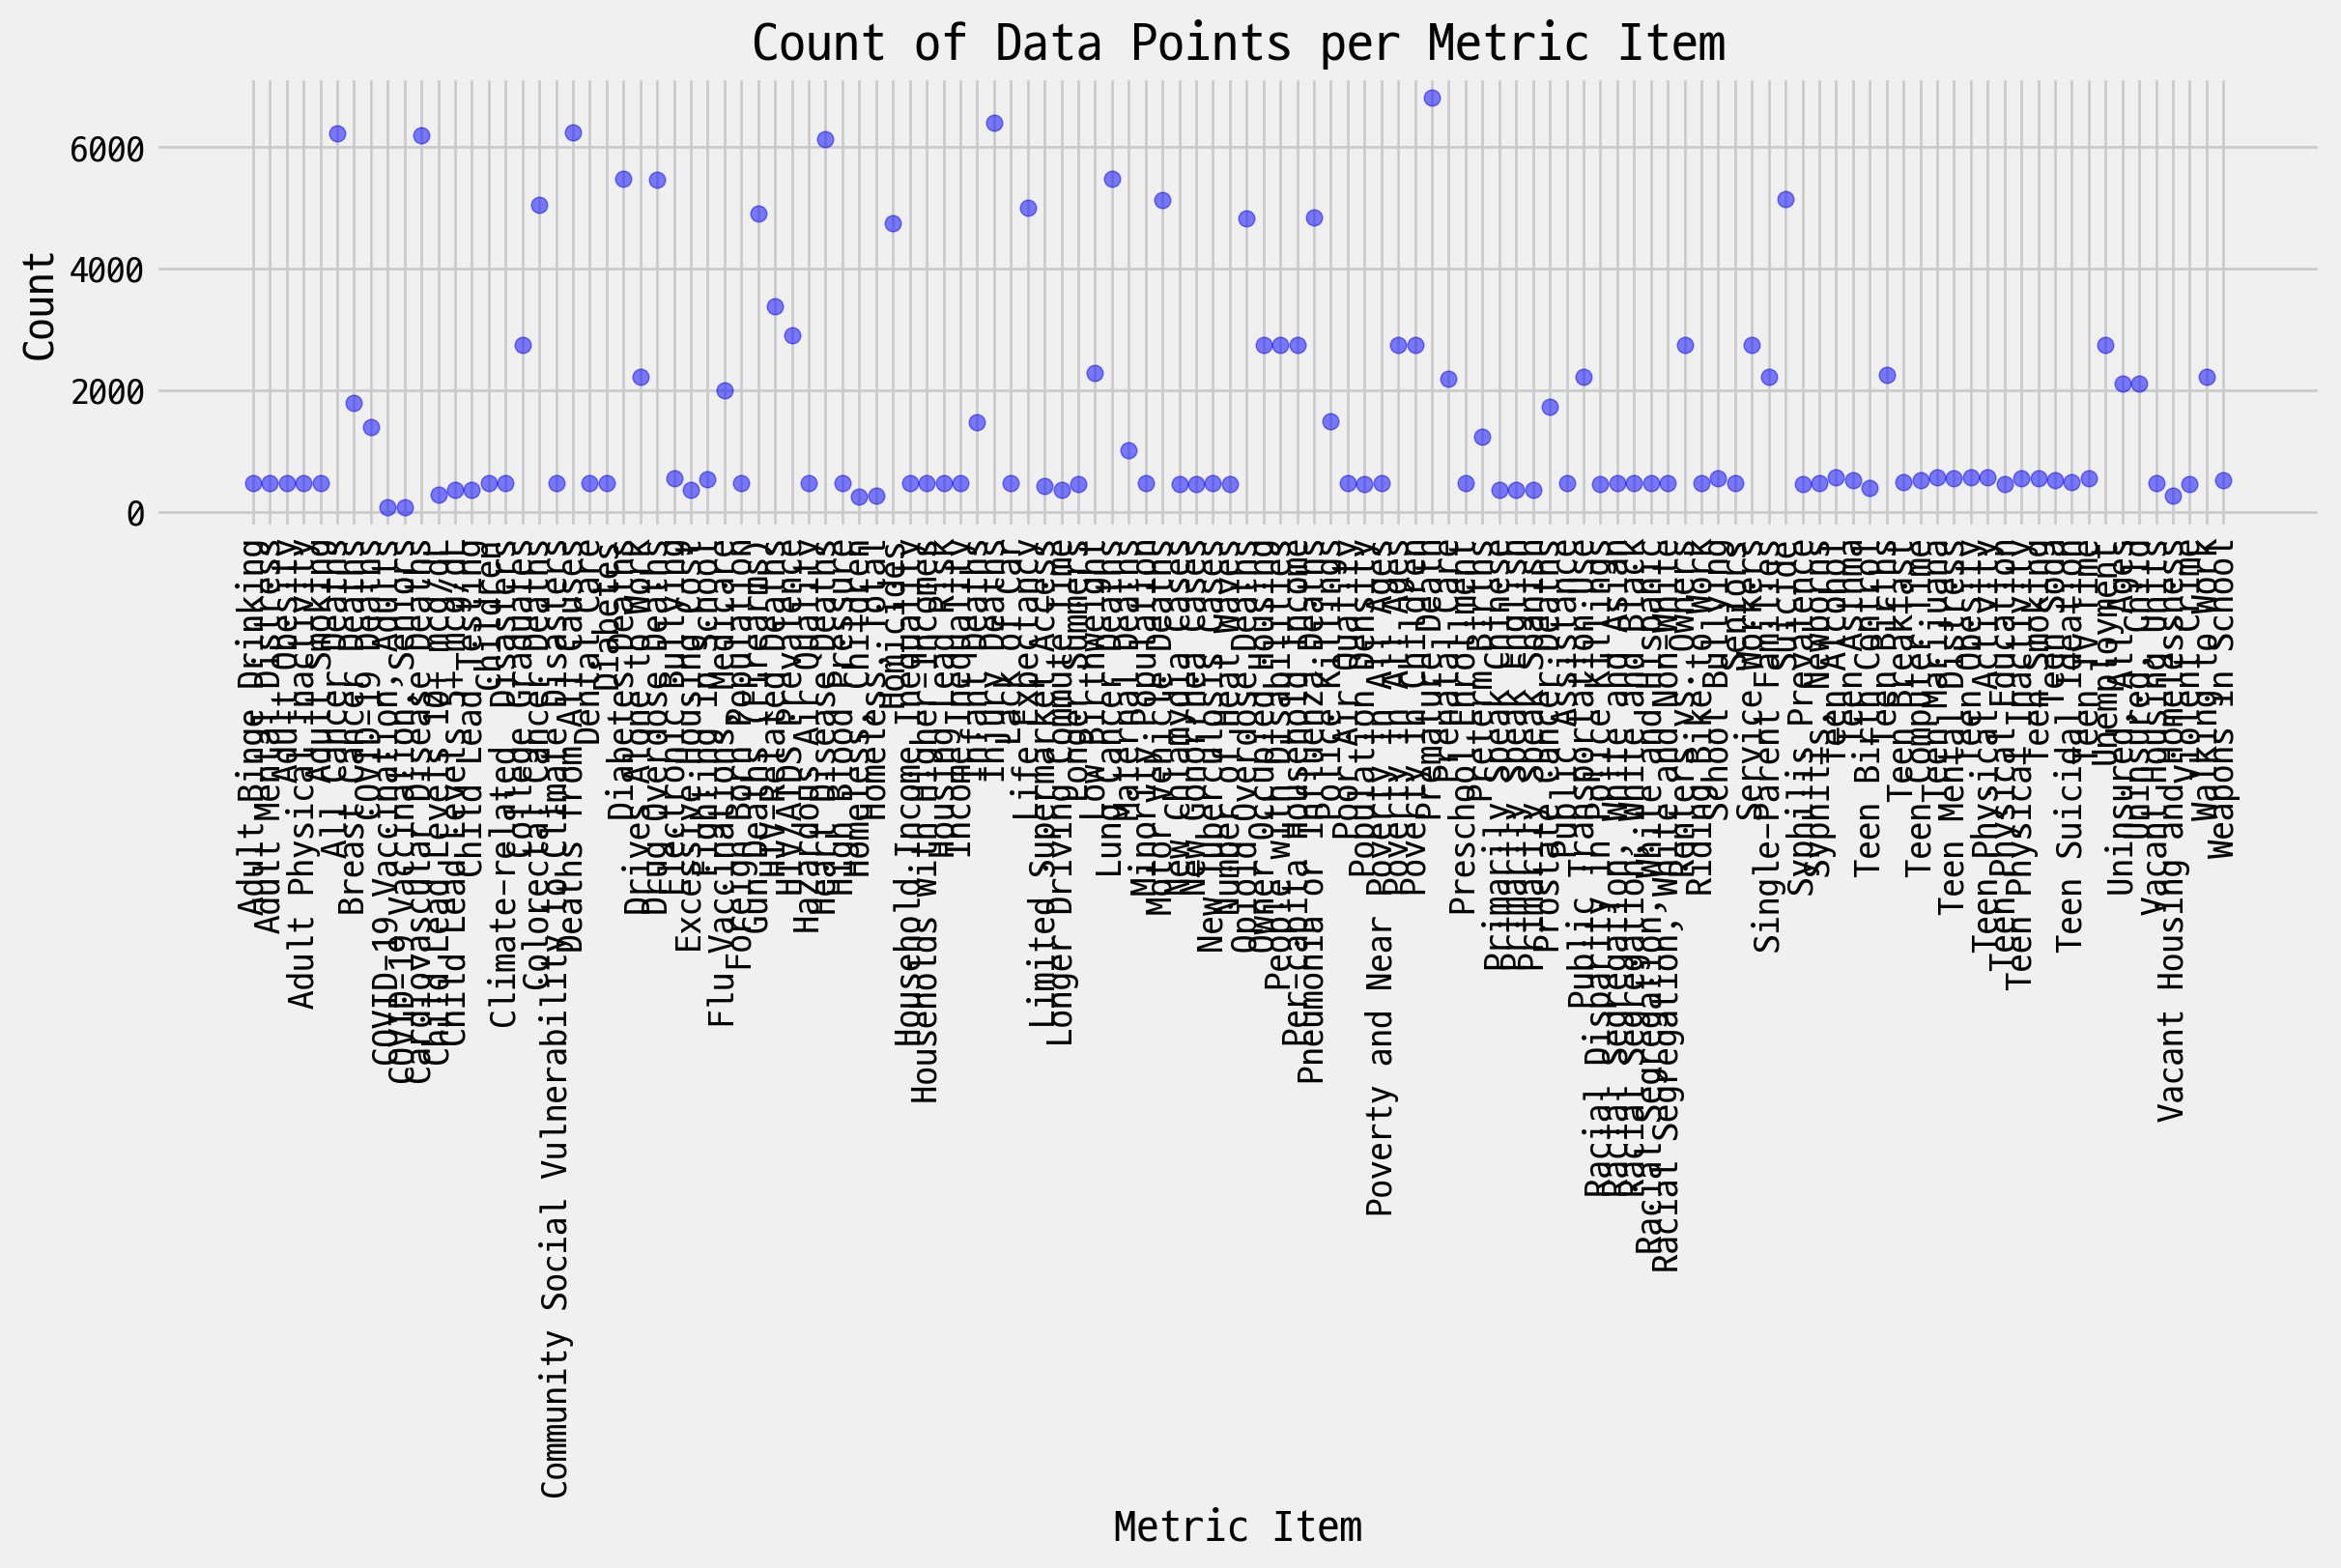

In [129]:
# 결측치가 60% 이상인 컬럼을 제거
threshold = 0.6
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# 데이터프레임의 수치형 컬럼 선택
numerical_columns = df_cleaned.select_dtypes(include='number').columns

# 결측치가 있는 행을 삭제
df_cleaned = df_cleaned.dropna(subset=numerical_columns)

# 'metric_item_label' 컬럼을 기준으로 데이터를 정렬하고 그룹화
sorted_data_by_metric = df_cleaned.sort_values(by='metric_item_label')
grouped_data_by_metric = sorted_data_by_metric.groupby('metric_item_label')

# 각 그룹의 데이터 포인트 수 계산
counts = grouped_data_by_metric.size()

# 데이터 포인트 수를 산점도로 시각화
plt.figure(figsize=(12, 8))
plt.scatter(counts.index, counts.values, alpha=0.5, color='blue')
plt.xlabel('Metric Item')
plt.ylabel('Count')
plt.title('Count of Data Points per Metric Item')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

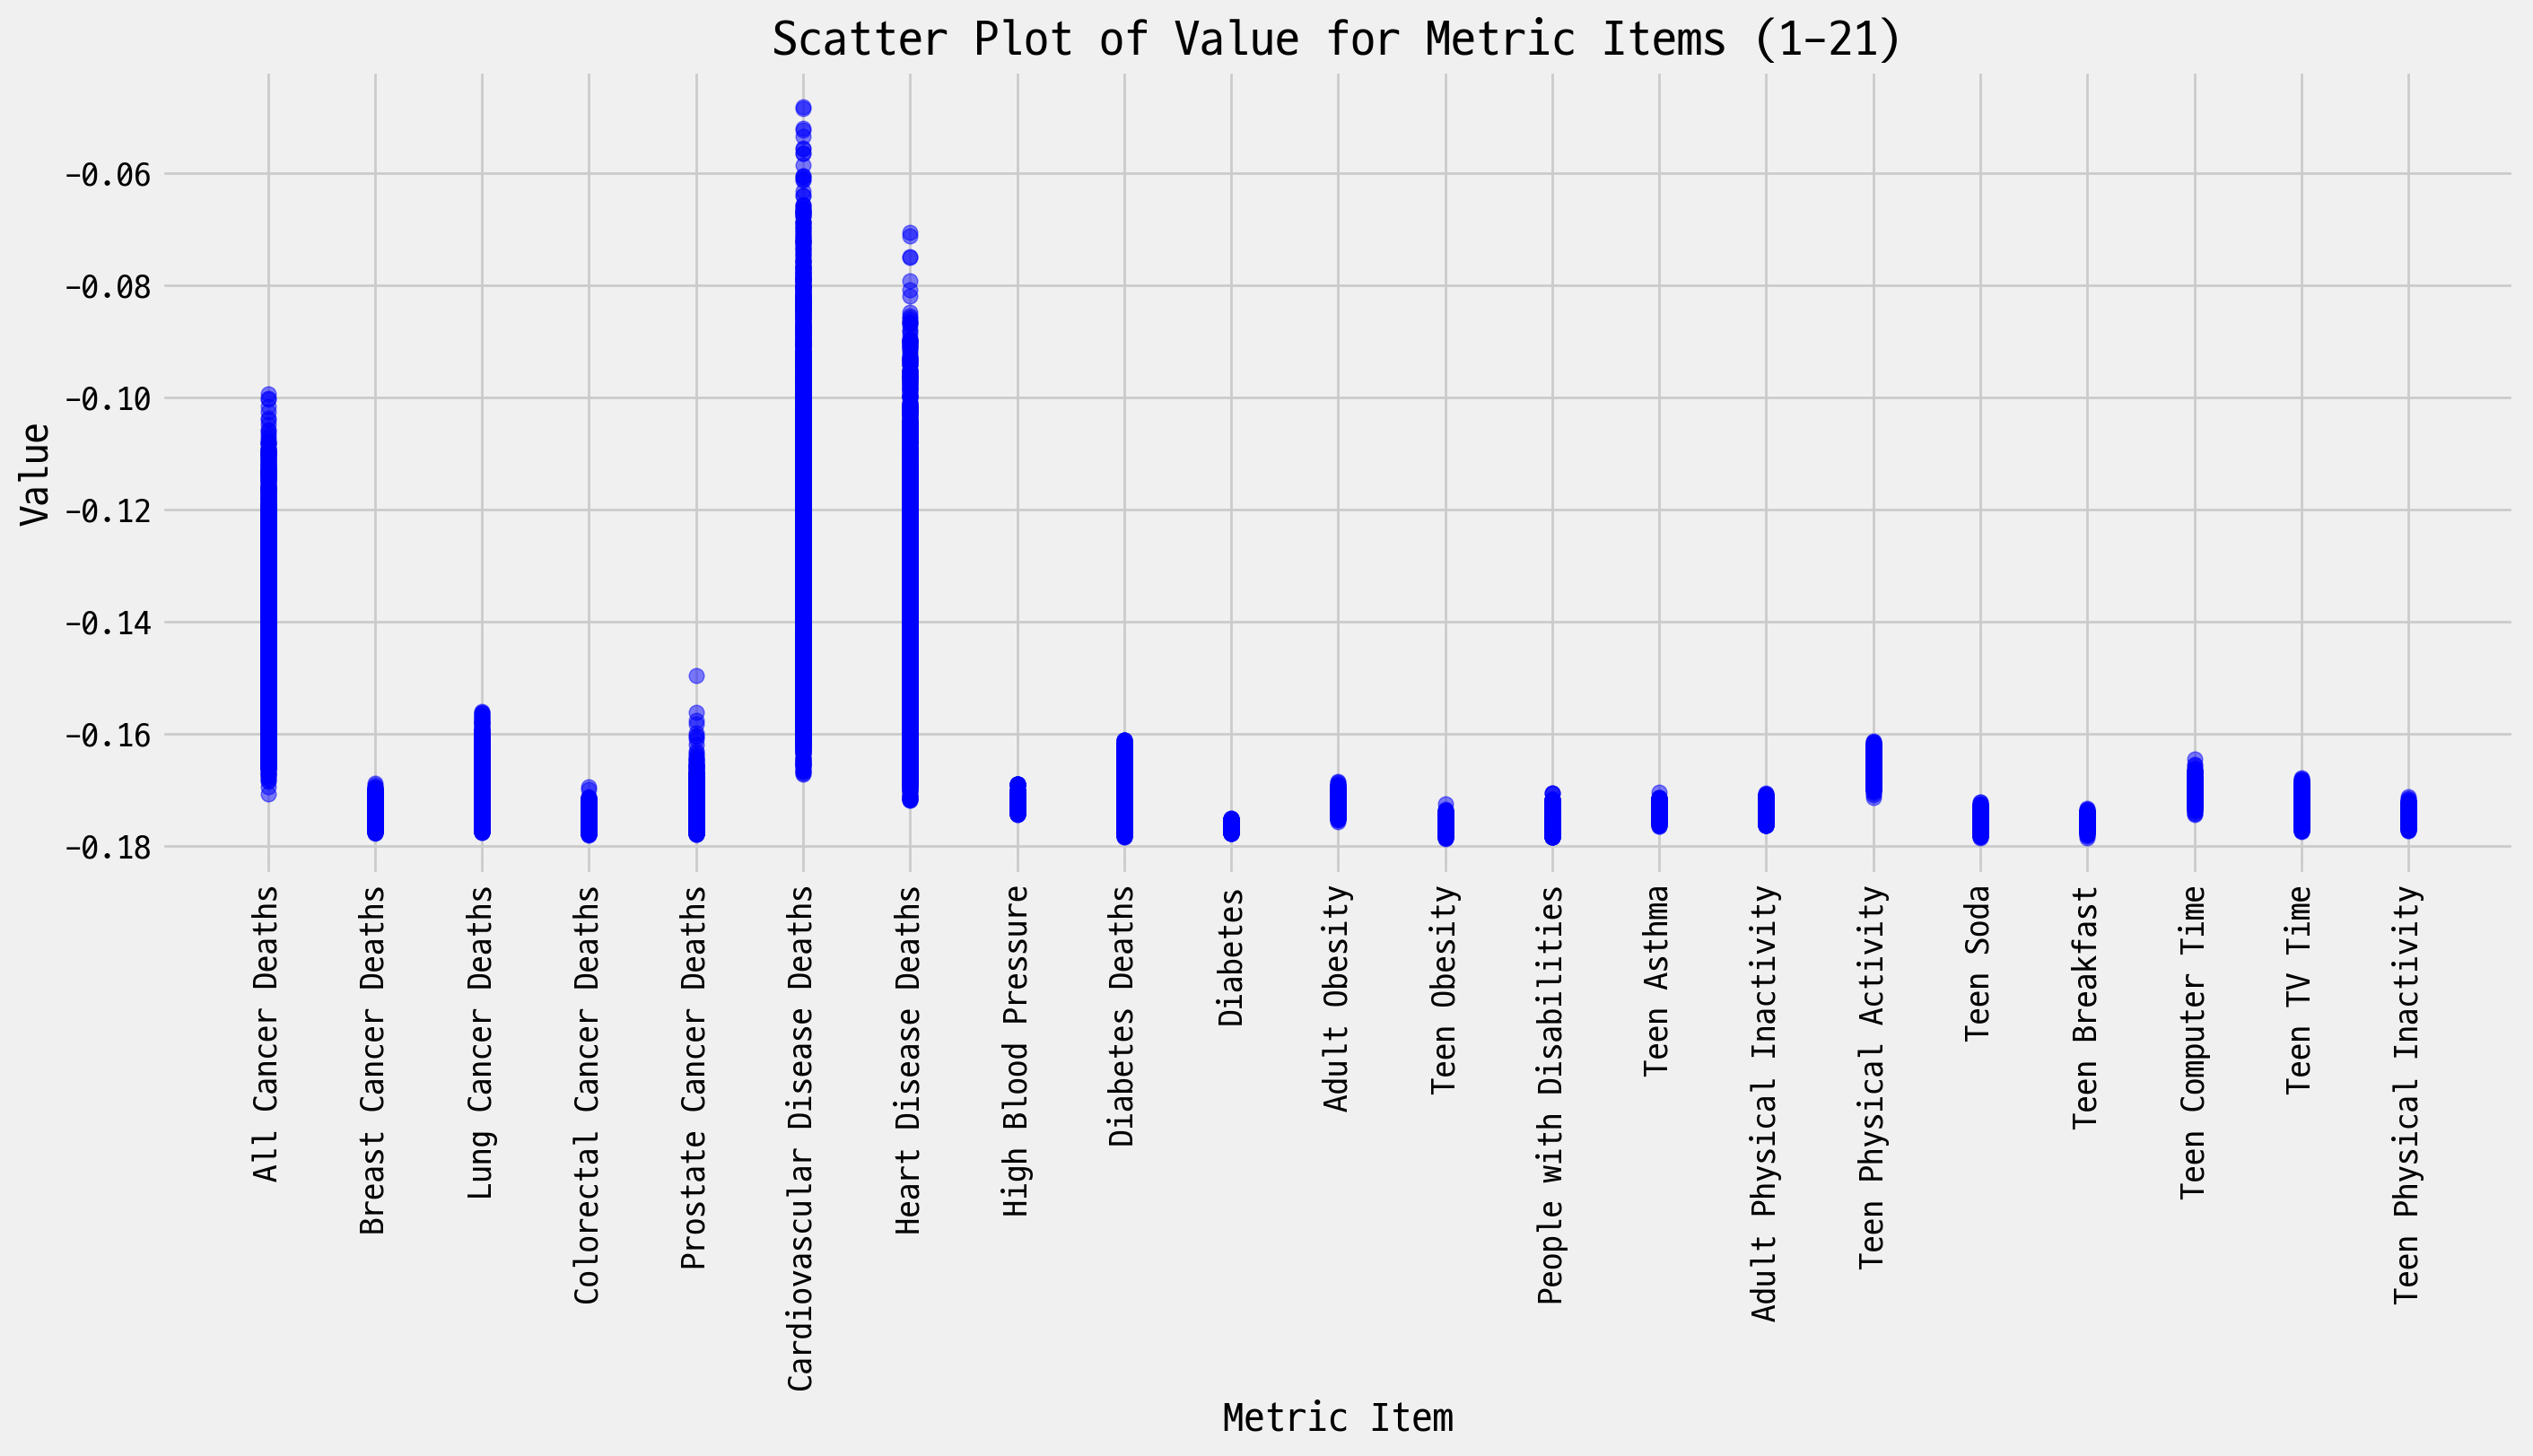

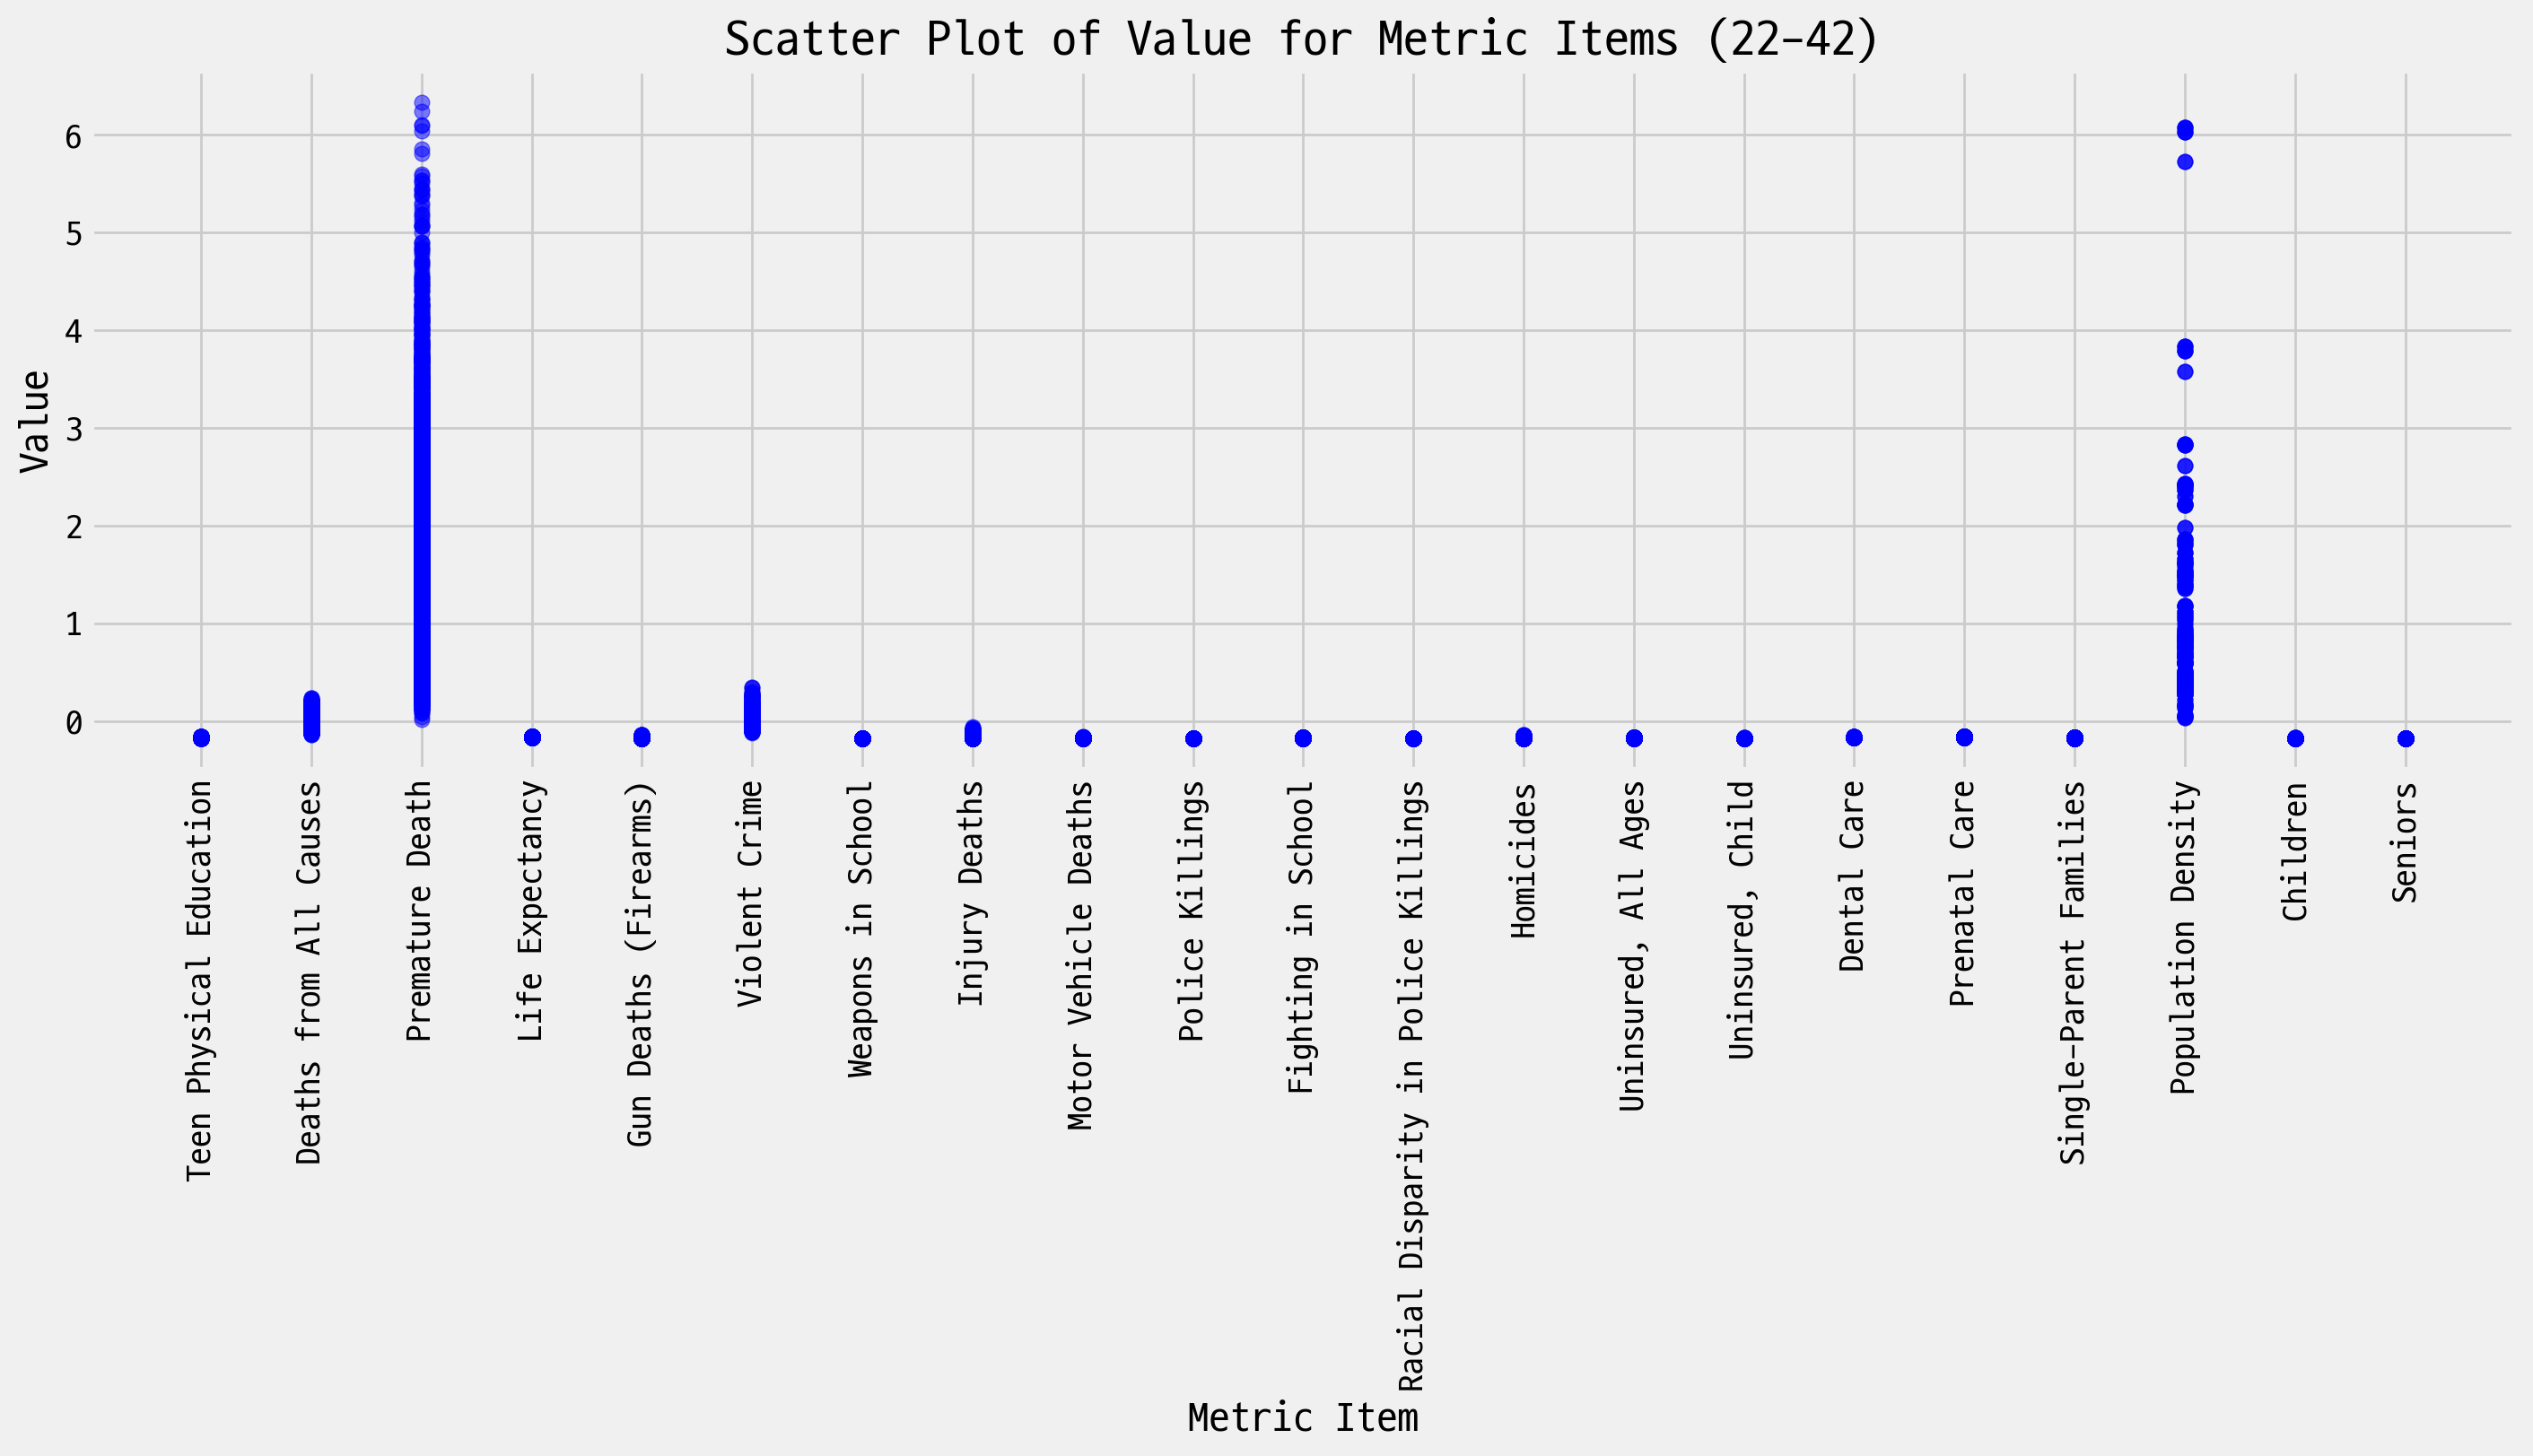

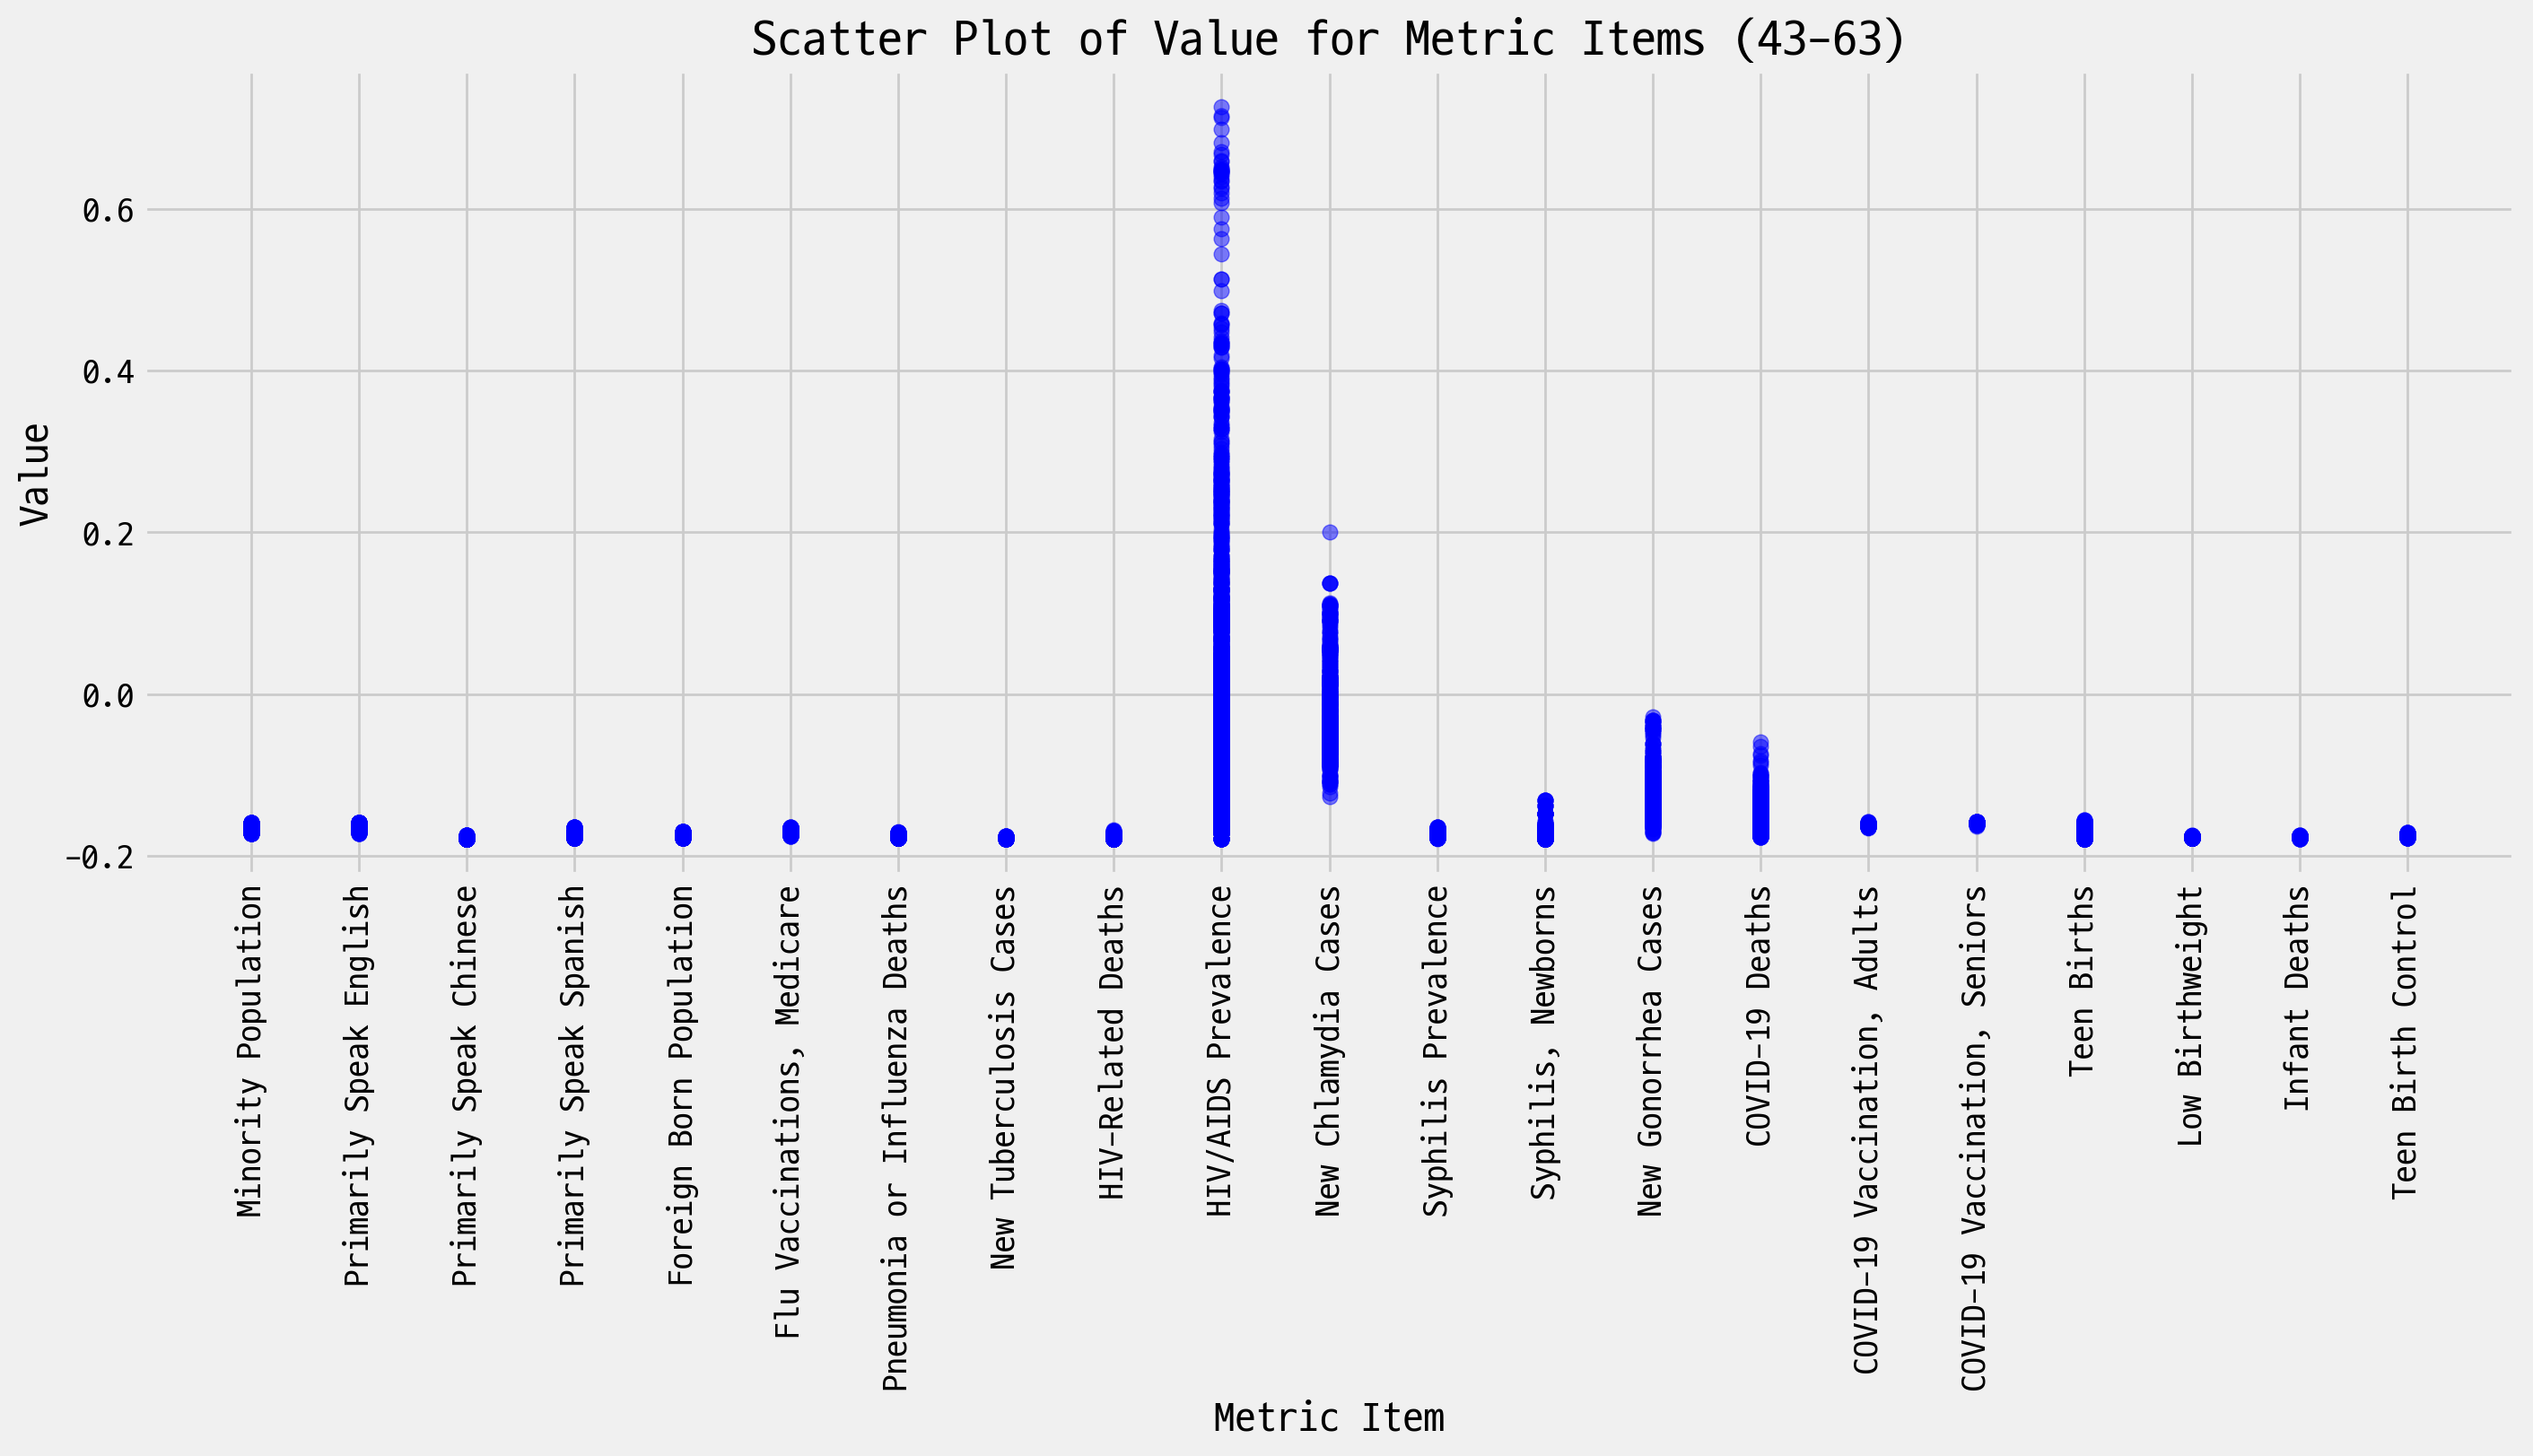

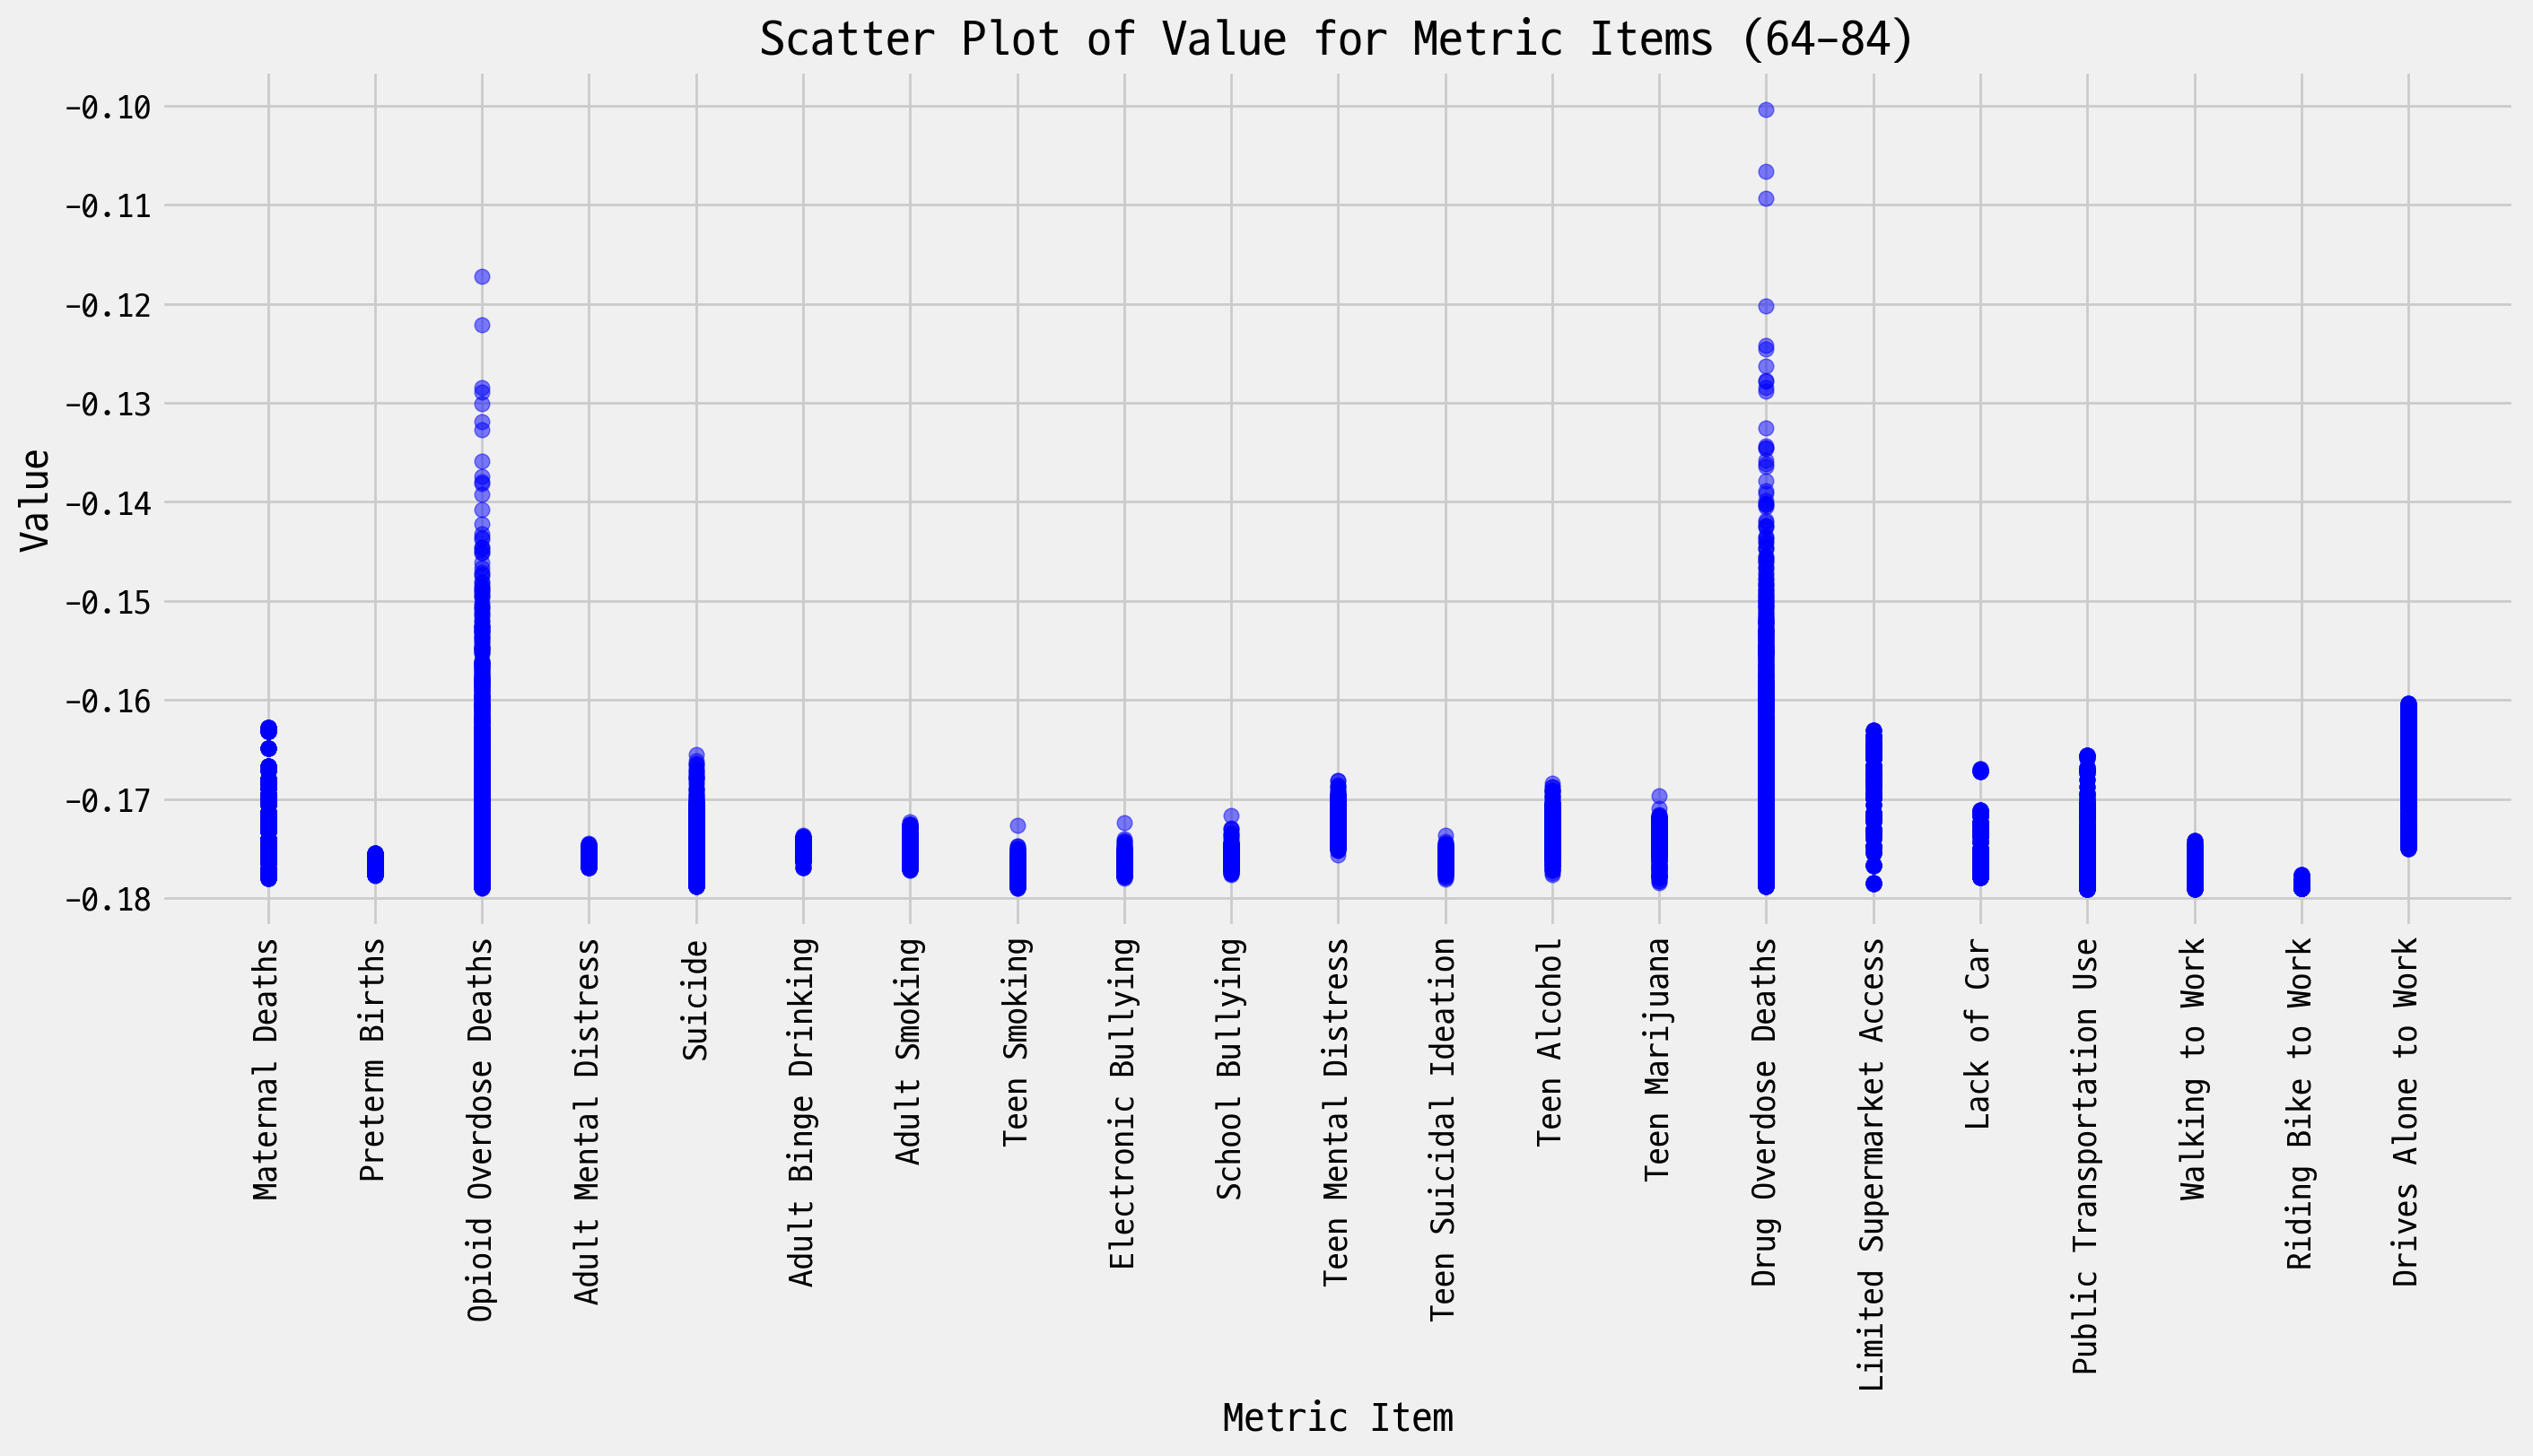

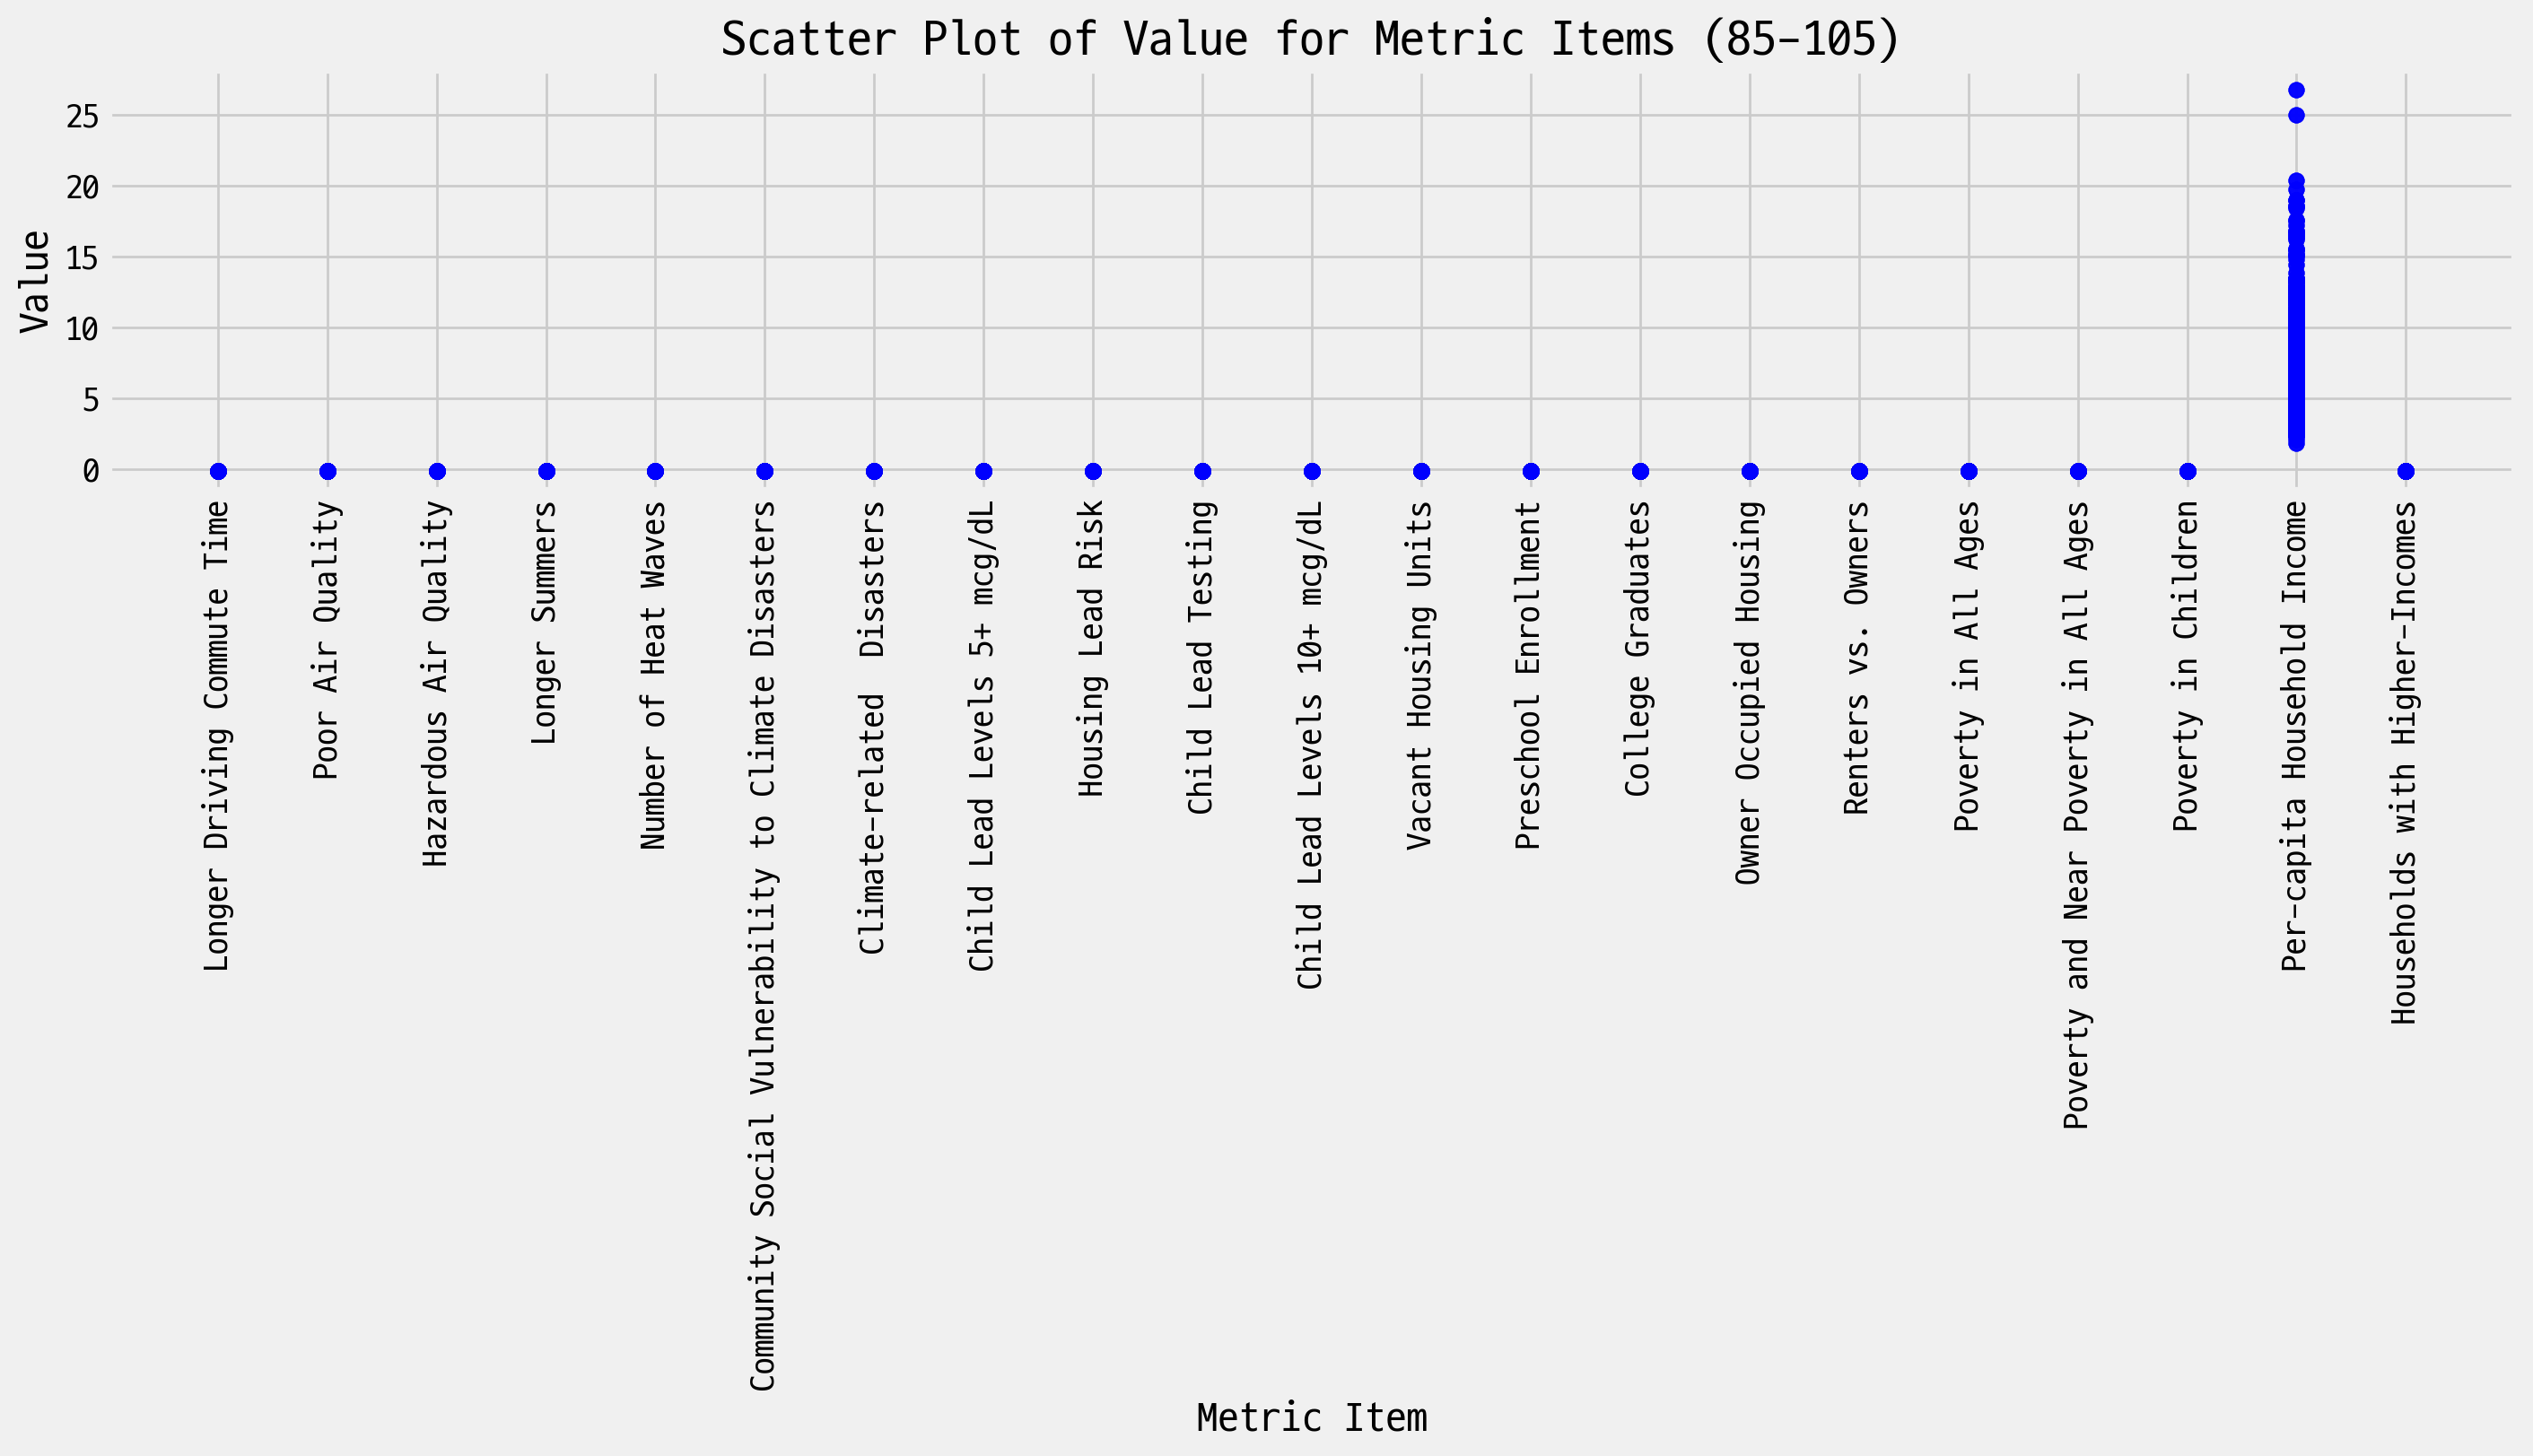

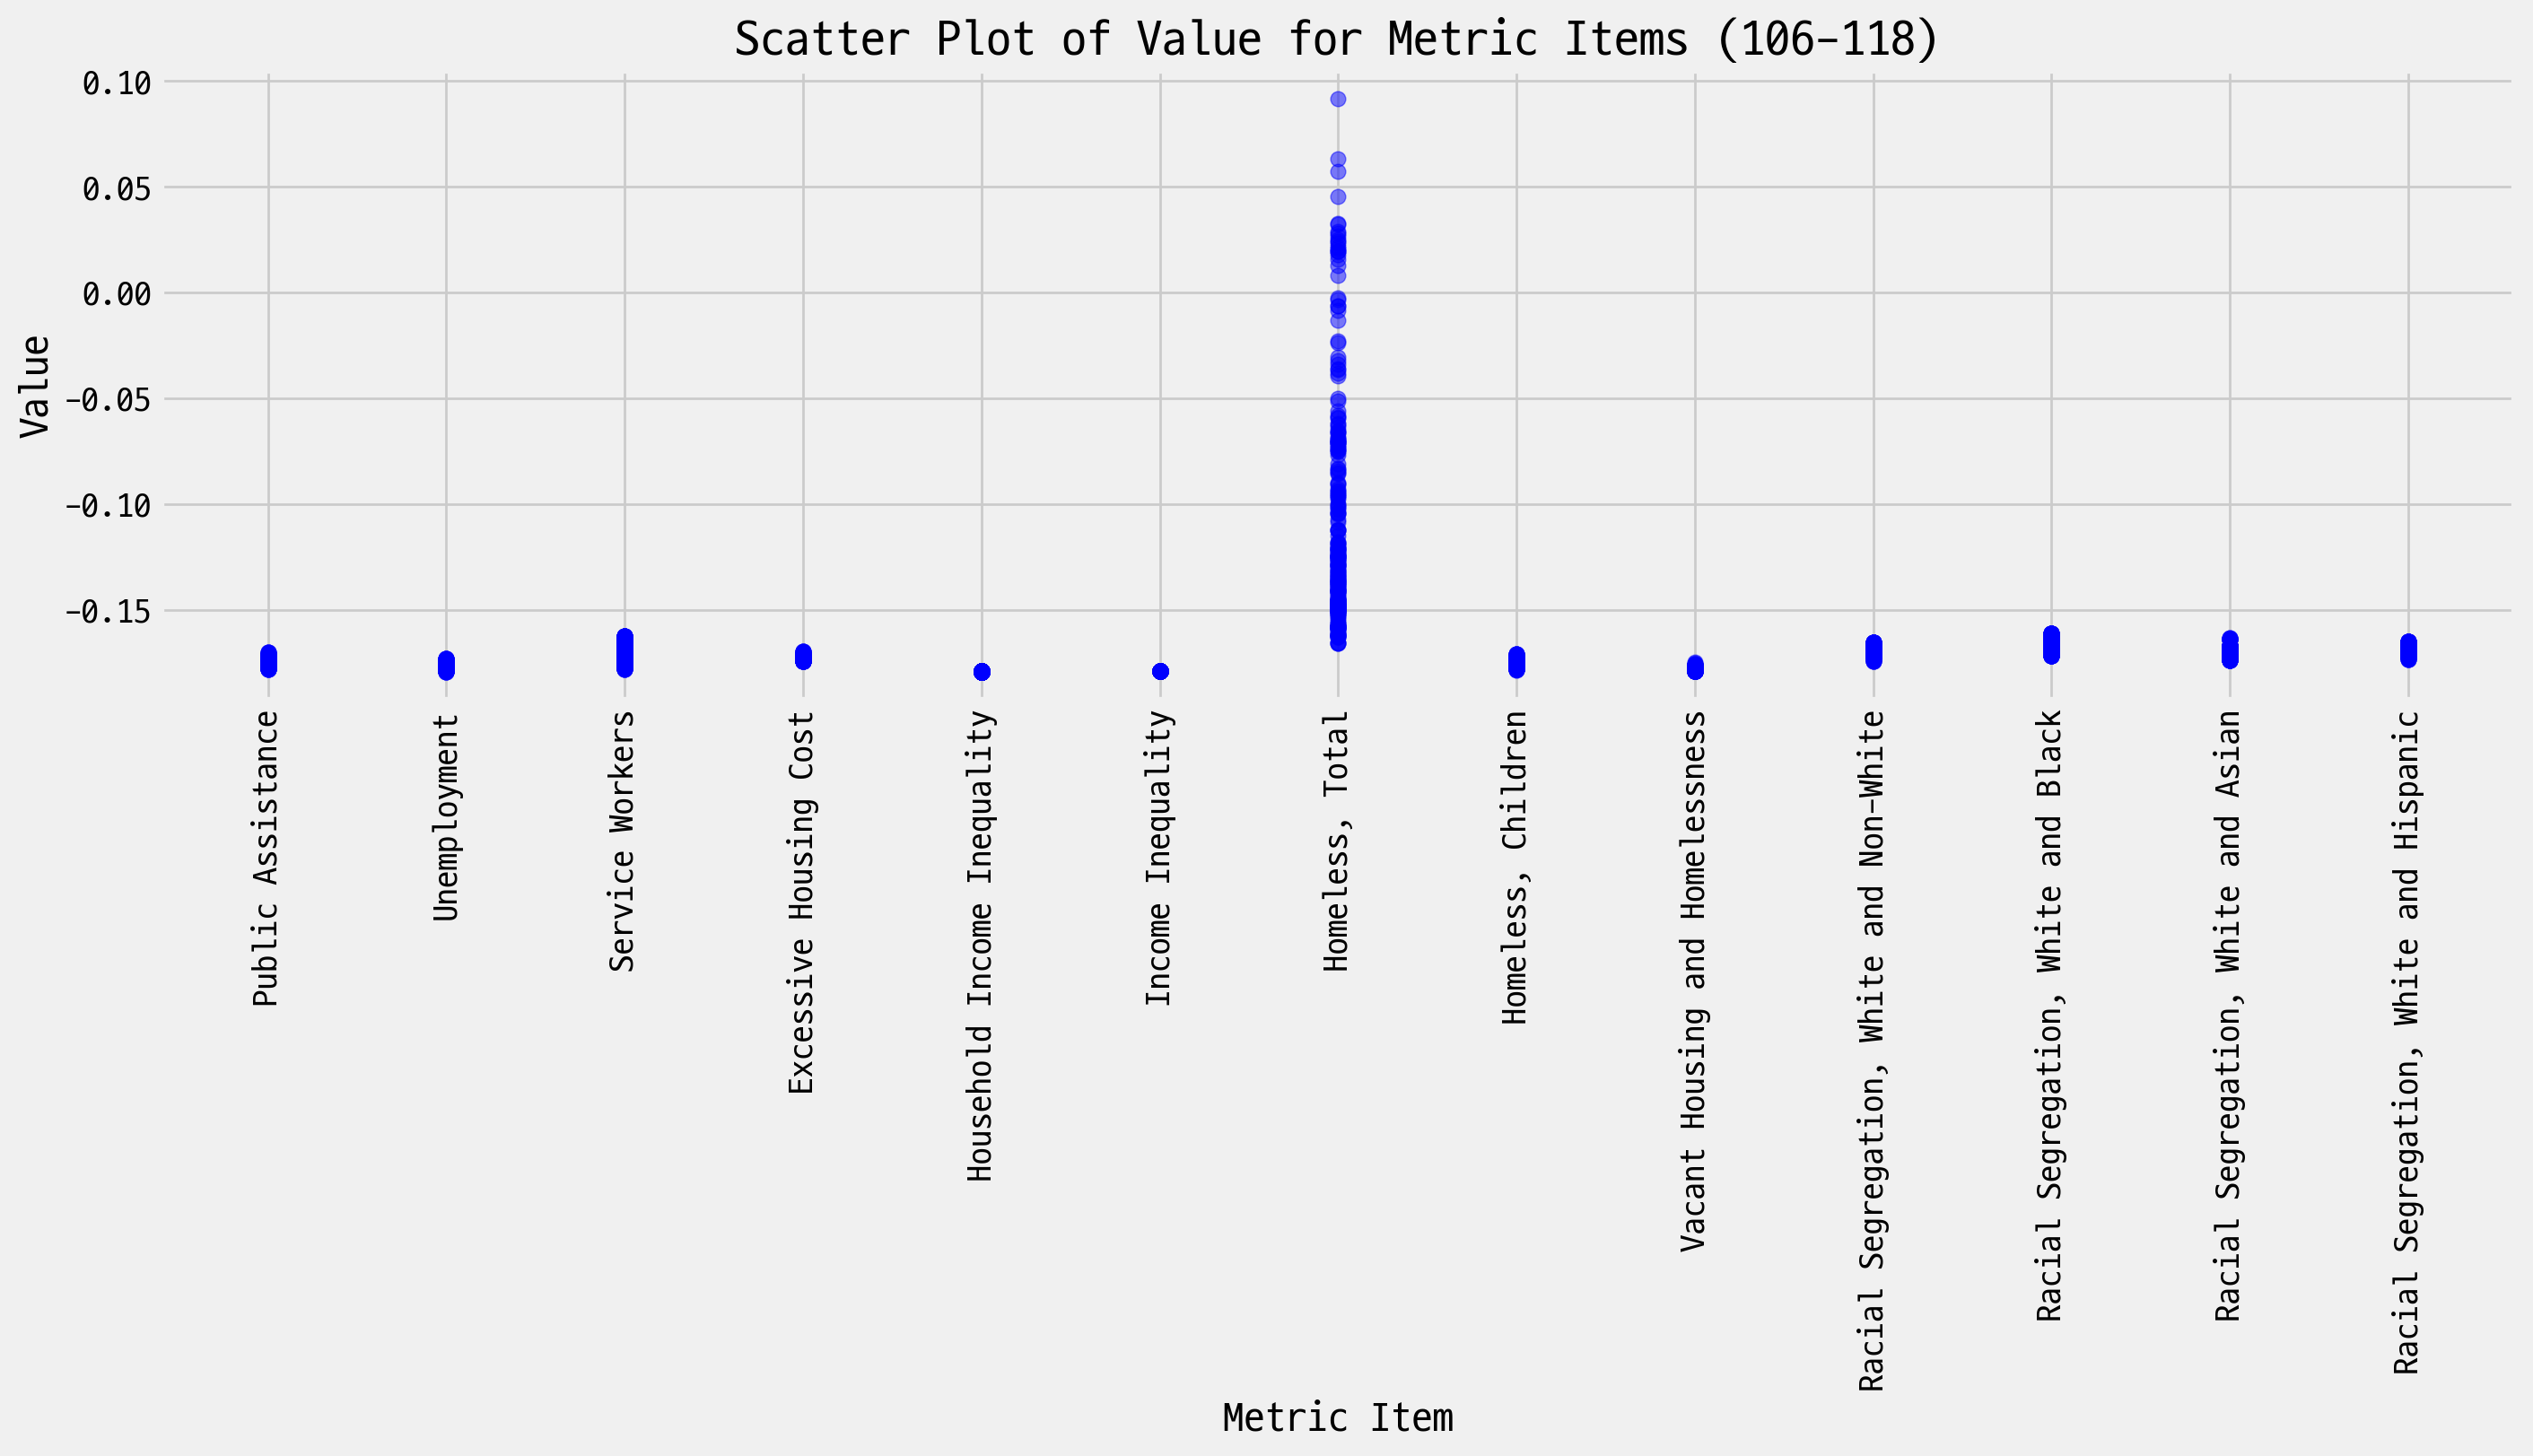

In [131]:
# 결측치가 60% 이상인 컬럼을 제거
threshold = 0.6
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# 데이터프레임의 수치형 컬럼 선택
numerical_columns = df_cleaned.select_dtypes(include='number').columns

# 결측치가 있는 행을 삭제
df_cleaned = df_cleaned.dropna(subset=[value_column])

# metric_item_label의 고유한 값들
unique_metric_items = df_cleaned['metric_item_label'].unique()

# 고유한 값들을 21개씩 끊어서 시각화
for i in range(0, len(unique_metric_items), 21):
    chunk = unique_metric_items[i:i+21]
    chunk_data = df_cleaned[df_cleaned['metric_item_label'].isin(chunk)]
    
    plt.figure(figsize=(14, 8))
    plt.scatter(chunk_data['metric_item_label'], chunk_data['value'], alpha=0.5, color='blue')
    plt.xlabel('Metric Item')
    plt.ylabel('Value')
    plt.title(f'Scatter Plot of Value for Metric Items ({i+1}-{min(i+21, len(unique_metric_items))})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()